# I. Découverte et manipuation de a base MNIST

## I.1. Chargement des bibiothèques Python

In [1]:
# Bibliothèque
!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from skimage.feature import hog
from skimage import exposure
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

  Using cached scikit_image-0.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached imageio-2.36.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2024.12.12-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.25.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.8 MB)
Using cached imageio-2.36.1-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2024.12.12-py3-none-any.whl (227 kB)


## I.2. Chargement des données


In [2]:
#Chargement de la base de données
X, y = fetch_openml(name='mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

In [3]:
X[0].shape

(784,)

In [4]:
y[0]

'5'

Visualisation des données

In [5]:
28*28

784

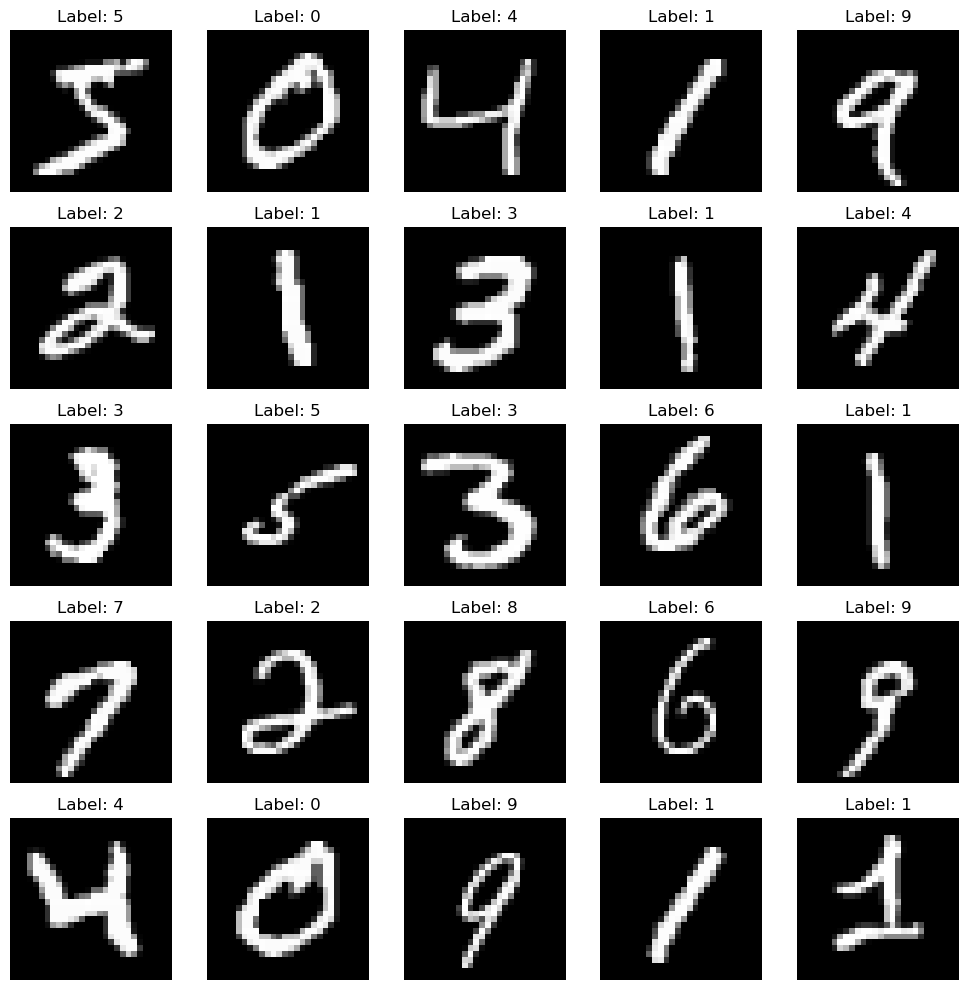

In [6]:
# Visualiser les 5 premieres lignes et colonnes de X et y
n_rows, n_cols = 5, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

# Affichage des images
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Réponse 6: les valeurs de pixels d'une image sont entre 0 et 255, le noir de l'image qui est le fond est representé  par un 0, et le blanc de l'image est presenté par des valeurs plus élévé (10,48,252), qui varie selon les nuances du blanc

In [7]:
#En utilisant la fonction shape de numpy, déterminez le nombre d’images
print(f"Nombre d’images de la matrice X : {X.shape[0]}")
#Extraire la première image de X
vecteur_image= X[1]
matrice_image= vecteur_image.reshape((28,28))
print(f"Matrice de la première image : {matrice_image}")



Nombre d’images de la matrice X : 70000
Matrice de la première image : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   

Réponse 7: La normalisation des valeurs de X en devisant par la valeur max q'un pixel peut prendre

In [8]:
# Normaliser en devisant par la plus grande valeur des pixels : 255.0
X= X / 255.0

In [9]:
X.shape

(70000, 784)

Réponse8: Visualiser l'image

L'étiquette correspondante de l'image 1: 0


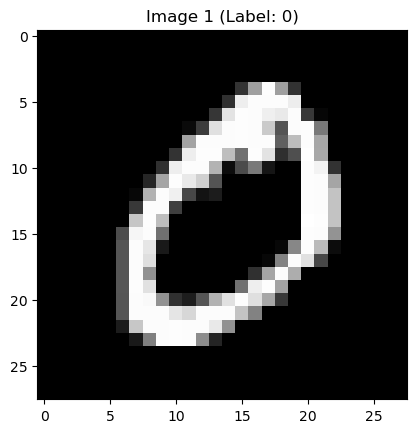

In [10]:
# Afficher premiere image de y
print(f"L'étiquette correspondante de l'image 1: {y[1]}")
plt.imshow(matrice_image, cmap='gray')
plt.title(f"Image {1} (Label: {y[1]})")
plt.show()

In [11]:
# Pour filtrer les lignes de X pour garder seul celle avec étiquette 3
lignes_filtre_3= X[y == '3']
print(f"Nombre d'images étiquetées '3' : {lignes_filtre_3.shape[0]}")

Nombre d'images étiquetées '3' : 7141


Réponse 9: Utiliser une boucle pour parcourir l'ensemble des étiquette de la base de données,et compter le nombre de sous matrices représentant le chiffre

Les tailles des classes ne sont pas parfaitement équilibrées

In [12]:

NB_etiquette={}
# Compter le nombres des images de chaque classe de 0 à 9
for i in np.unique(y):
  compteur=np.sum(y==i)
  NB_etiquette[i]= compteur
  print(f"Nombre d'image du chiffre {i}: {compteur}")

# Comparer taille des classes
if min(NB_etiquette.values()) == max ( NB_etiquette.values()):
  print("La base de données est équilibrée")
else:
  print("La base de donnée n' est pas équilibré")


Nombre d'image du chiffre 0: 6903
Nombre d'image du chiffre 1: 7877
Nombre d'image du chiffre 2: 6990
Nombre d'image du chiffre 3: 7141
Nombre d'image du chiffre 4: 6824
Nombre d'image du chiffre 5: 6313
Nombre d'image du chiffre 6: 6876
Nombre d'image du chiffre 7: 7293
Nombre d'image du chiffre 8: 6825
Nombre d'image du chiffre 9: 6958
La base de donnée n' est pas équilibré


Réponse 10: Le + dans les expréssions booléens signifie le ou ligne , dans notre cas signie extraire les lignes contenant que les carateères 3 et 4

L'operateur * signifie le ET logique, utiliser pour comparer deux valeurs et retourne vrai seulement si toutes les conditions sont vraies

In [13]:

# on extrait des lignes de X qui vérifie que deux condition ou plus sont vraies
X_3_4=X[(y =='3') + (y =='4')]
y_3_4=y[(y =='3') + (y =='4')]

Réponse 11:  Créez une base de données ne contenant que les chiffres 0 et 1.

In [14]:
#Créez ainsi une base de données X_bin ne contenant que les chiffres 0 et 1.
X_0_1= X[(y=='1')+ (y=='0')]
y_0_1= y[(y=='1')+ (y=='0')]
#Vérifier que cela fonction bien
print(f"Les étiquettes présentent dans la BDD sont {np.unique(y_0_1)} ")

Les étiquettes présentent dans la BDD sont ['0' '1'] 


Réponse 12: Représenter dans 4 graphes successifs les premières images de la matrice filtrée.

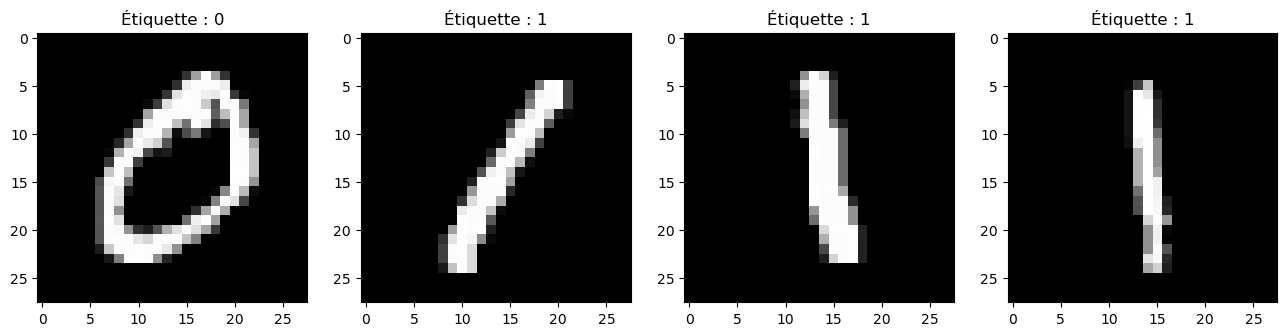

In [15]:
# Representer en graphes les premieres images de y binaire
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
for ax, img, lbl in zip([ax1, ax2, ax3, ax4], X_0_1[:4], y_0_1[:4]):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(f"Étiquette : {lbl}")
plt.show()

## I.3. Préparation des bases de données d’entrainement et test

Réponse 13: Division des données en ensembles d'entraînement et de test

In [16]:

#Division des données en ensembles d'entraînement et de test en utilsant la fonction train_test_split qui prend 80% des données pour l'entrainement et le reste pour les tests
X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=42)



Réponse 14: Justifiez le choix des tailles de chaque ensemble: ici on a choisi une base d'entrainement de taille de 80%, car une grande base d'entrainement permet au modèle de mieux apprendre les données et de ne pas tomber dans le overfitting ou underfitting ce qui lui permet une meilleure généralisation
Pour ce qui est de la base de données des tests, elle est de taille de 20% de la taille initial, est utiliser pour mesurer la performances des modèles face à des données jamais vues, en général la règle 80/20 est la mieu adapter pour la division des données


## I.4. Manipuation des images

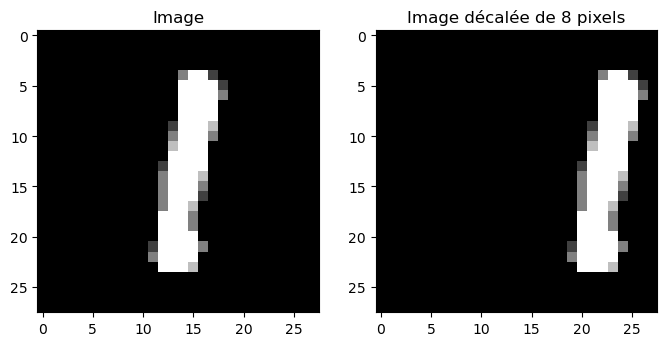

In [17]:
#Manipulation des images avec numpy.roll
decalage = 8

image = X_train[1].reshape((28, 28))
image_decalage = np.roll(image, decalage, axis=1)

# Visualisation de l'effet
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(image_decalage, cmap='gray')
plt.title(f"Image décalée de {decalage} pixels")
plt.show()


Reponse 15: La fonction roll décale les valeurs des vecteurs de la matrice de l'image selon le nombre de positions spécifiées en paramètre.
En changeant les valeur du paramètre shift, on remarque que les valeurs qui se décalent et sortent du côté droit, apparaissent du coté gauche, selon l'axe=1, si on utilise l'axe=0, alors l'image va se décaler vers le bas, et les valeurs qui sortent en bas apparaîtront du haut

## I.5. Récapituons

Reponse 16:

In [18]:

# Précedament on a extré les valeurs des étiquettes '0' et '1' dans X_0_1 et y_0_1

# Création de la classe 'z' en mal centrant les images des classe '0' et '1'
# On décale les valeurs de X_0_1 pour créer X_z
X_z= np.roll(X_0_1, shift=decalage, axis=1)
y_z = np.array(['z'] * len(X_z))

# Creation de la nouvelle base de données composées des classes '0', '1' et 'z'
X_combiner = np.concatenate([X_0_1, X_z])
y_combiner = np.concatenate([y_0_1, y_z])

# Vérifion la les valeurs des étiquettes
print(f"Les valeurs des étiquettes présentes: {np.unique(y_combiner)}")



Les valeurs des étiquettes présentes: ['0' '1' 'z']


# II. Cassification par SVM et kNN
## II.1. Cassification par SVM
### II.1.1. Cassification binaire inéaire

Réponse 17: on a déja  séléctionner une sous partie à deux chiffres '3' et '4' de la base de données : X_3_4 et y_3_4

Réponse 18:
Visualisation des troix premières images

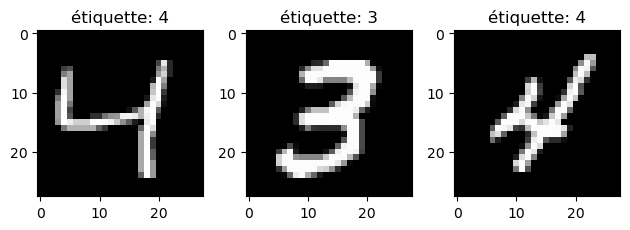

La taille de l' ensemble des données : (13965, 784)


In [19]:

# Visualisation des troix premières images
fig, axes = plt.subplots(1, 3)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_3_4[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"étiquette: {y_3_4[i]}")

plt.tight_layout()
plt.show()

#Diviser les données en X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X_3_4, y_3_4, test_size=0.2, random_state=42)

print(f"La taille de l' ensemble des données : {np.shape(X_3_4)}")

Réponse 19: Construire un classifieur binaire linéaire

In [ ]:

classifier = svm.SVC(kernel='linear')
#Entrainement du classifieur
classifier.fit(X_train, y_train)

Réponse 20: Entrainement du modèle

In [ ]:
#Entrainer
classifier.fit(X_train, y_train)

Réponse 21:
Tester le classficateur sur la base de données d'entrainment

In [18]:

# tester le classficateur sur la base de données d'entrainment
y_pred = classifier.predict(X_train)

train_score = classifier.score(X_train, y_train)

print(f"Score d'entraînement : {train_score:.2f}")
print(classification_report(y_train, y_pred))


Score d'entraînement : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5501
           1       1.00      1.00      1.00      6323

    accuracy                           1.00     11824
   macro avg       1.00      1.00      1.00     11824
weighted avg       1.00      1.00      1.00     11824



Réponse 21: Tester le classificateur sur la base de dnnées de test

In [19]:
#Tester le classificateur sur la base de dnnées de test
y_test_pred = classifier.predict(X_test)
test_score = classifier.score(X_test, y_test)
print(f"Score de test : {test_score:.2f}")
print(classification_report(y_test, y_test_pred))

#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_test)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )


Score de test : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



Réponse 22: Que remarquez-vous ? Est-ce cohérent ?

On va comparer les résultats selon le f1-score car les classes '3' et '4' ne sont pas équilibrées, ce qui fait que F1-score reflètera mieux l'équilibre entre les deux en prenant en compte les faux positifs et les faux négatifs.
En observant les resultats du classificateur sur les données d'entrainement on retrouve un f1-score de 100%, ce qui tout a fait normal car le modèle s'est entrainé sur ces données là, et est arrivé à capturer correctement les caractéristiques des images.
Pour ce qui est des résultats du classificateur sur le données de test, le f1-score est de 0.99, ce qui montre que le modèle généralise bien, et classifie correctement les données jamais vues.

Réponse 23: vérifier le pourcentage de prédictions correctes calculé est identique au score retourné par classifier.score.

Pour cela on peut calculer la moyenne entre y_test_pred et y_test, et si cette valeur est proche ou égale au score alors les résultats sont justes

In [20]:

#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_test)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )
# On constate les résultats sont exactes, donc le resultat classifier.score est bien correcte


Le score retourné par classifier.score : 0.9996617050067659, L' accuracy calculé: 0.9996617050067659


Réponse 24:
Explication du principe de fonctionnement de SVM:
Pour classer les données, SVM construit un hyperplan défini par l’équation w * xi +b=0 séparateur des classes dites positifs et négatifs, tel que w est un vecteur perpendiculaire à l'hyperplan et xi l'ensemble des données, l'objectif est de maximiser la distance entre les données des deux classes.
Pour cela on définit la marge qui est la distance minimale entre un point de données et l’hyperplan, définit par 2/||w||, maximiser celà revient à minimiser ||w||/2 = 1/2 * w(transposé)* w.

On peut exprimer w en fonction dess vecteurs du support de l'hyperplan qui représentent les points les plus propche de ce dérnier: w= Sum(Vi * Ai) où Ai rprésentent des coéfficients de chaque vecteur.

Pour classier un nouveau point, on utilise la fonction de décision: f(x)= wT *x +b, où le signe de la fonction détérmine la cmasse de la donnée


In [ ]:

# Pour répondre à la question 24: on récupère le w et b
w = classifier.coef_[0]
b = classifier.intercept_[0]
# Pour vérifier que données classées de meme classe sont de signe constant, on va utiliser np.sign(fonction_decision[y_test ==3]), qui clacule le signe des resultat la fonction de decision pour les données de classe 3, puis on va faire de meme pour la classe 4
fonction_decision_3 = X_test[y_test ==3]@ w + b
fonction_decision_4 = X_test[y_test ==4]@ w + b
sign_class_3 = np.sign(fonction_decision_3)
sign_class_4 = np.sign(fonction_decision_4)
print(f"Signe de classe 3 constant :{np.all(sign_class_3 == 1)} et signe de classe 4 constant: {np.all(sign_class_4 == 1)}")

# Pour les données mal classées , on va prendre les données de fonction_decision qui sont mal classées selon y_test, puis on verifie le signe
fonction_decision= X_test@ w + b
class_malclassé = (y_test != np.where(fonction_decision > 0, '3', '4'))
sign_oppsé= np.sign(fonction_decision[class_malclassé])
signe_correcte = np.array([1 if label == '3' else -1 for label in y_test[class_malclassé]])
print(f" les signe des données mal classées: {sign_oppsé} est effectivent l'oposé de ceux qu 'il devrait etre :{signe_correcte} ")


Signe de classe 3 constant :True et signe de classe 4 constant: True
 les signe des données mal classées: [-1. -1. -1. ...  1.  1.  1.] est effectivent l'oposé de ceux qu 'il devrait etre :[ 1  1  1 ... -1 -1 -1] 


## II.1.2. Cassification générique

Reponse 26: utiliser le SVM avec noyau rbf de parametres :

 C contrôle l'équilibre entre la complexité du modèle et la généralisation, et gamma influence la forme de l'hyperplan et définit l'influence des points d'entraînement.

rbf est déal pour capturer des relations complexes non-linéaires

In [16]:
# Entrainer le modele SVM avec les données des classes 3 et4
# Diviser les données en ensemble d 'entrainement et test
#X_train, X_test, y_train, y_test = train_test_split(X_3_4, y_3_4, test_size=0.2, random_state=42)
classifier_rbf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
#Entrainer
classifier_rbf.fit(X_train, y_train)
# Calculer les scores
train_score_rbf = classifier_rbf.score(X_train, y_train)
test_score_rbf = classifier_rbf.score(X_test, y_test)

print(f"Score SVM RBF sur l'ensemble d'entraînement : {train_score_rbf:.2f}")
print(f"Score SVM RBF sur l'ensemble de test : {test_score_rbf:.2f}")


Score SVM RBF sur l'ensemble d'entraînement : 1.00
Score SVM RBF sur l'ensemble de test : 1.00


In [ ]:
# Créer et entraîner un SVM linéaire sur l'ensemble des classes de la BDD
X_sample, _, y_sample, _ = train_test_split(
    X, y,
    test_size=0.6,
    stratify=y,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Tester le modèle
y_pred_linear = svm_linear.predict(X_test)

# Afficher les résultats
print("Classification report for SVM (linear, 10 classes):")
print(classification_report(y_test, y_pred_linear))


Réponse 27: Affiner les choix des paramétres
rbf est déal pour capturer des relations complexes non-linéaires.
Une grande valeur de C peut entrainer un surapprentissage, une faible valeur améliore la généralisation mais tolère les erreurs d'entrainement.
Une valeur faible gamma peut entrainer un sous apprentissage, et une grande valeur rend le modèle sensible aux données d'entrainment.

Pour amélioer les résultat on peut entrainer les modèles avec multiples valeurs de paramétres, puis choisir celle qui aboutit à un mailleur score


### II.1.3. Cassification des représentations HOG




Réponse 28:

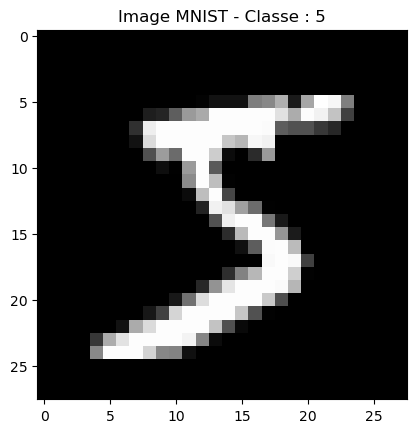

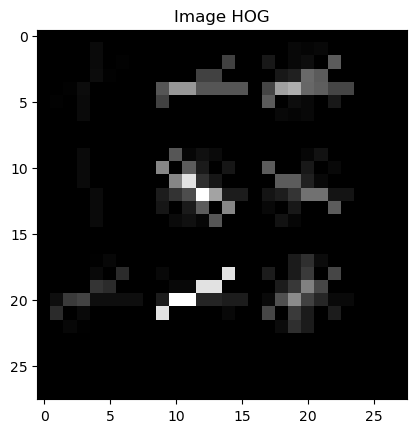

Taille du vecteur hog : (144,)


In [17]:

#Extraire et transformer un vecteur de X
image_vecteur = X[0]
image_28x28 = image_vecteur.reshape(28, 28)
#Vérification de l'image
plt.imshow(image_28x28, cmap='gray')
plt.title("Image MNIST - Classe : {}".format(y[0]))
plt.show()

# Extraire avec hog le vecteur de gradients orientés
fd, hog_image = hog(image_28x28, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Image HOG")
plt.show()

print(f"Taille du vecteur hog : {fd.shape}")


Réponse 29:  l’impact des options principales:

pixels_per_cell : définit la taille de chaque cellule en pixels. HOG capture plus de détails locaux quand la valeur est petite.

cells_per_block :définit le nombre de cellules dans chaque bloc utilisé pour la normalisation des gradients. Un bloc plus grand rend la représentation meillieur mais capture moins de détails.


Taille du vecteur HOG avec (8,8) : (144,)
Taille du vecteur HOG avec (4,4) : (441,)
Taille du vecteur HOG avec (16,16): (81,)


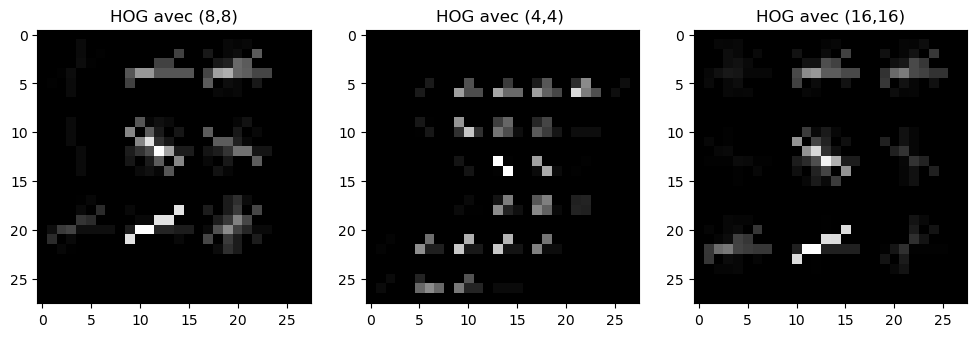

In [20]:

# Appliquer HOG avec différents paramètres
fd1, hog_image1 = hog(image_28x28, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
fd2, hog_image2 = hog(image_28x28, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
fd3, hog_image3 = hog(image_28x28, pixels_per_cell=(9, 9), cells_per_block=(3, 3), visualize=True)

# Afficher les images
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(hog_image1, cmap='gray')
axes[0].set_title("HOG avec (8,8)")
axes[1].imshow(hog_image2, cmap='gray')
axes[1].set_title("HOG avec (4,4) ")
axes[2].imshow(hog_image3, cmap='gray')
axes[2].set_title("HOG avec (16,16)")

# Taille du vecteur de hog
print(f"Taille du vecteur HOG avec (8,8) : {fd1.shape}")
print(f"Taille du vecteur HOG avec (4,4) : {fd2.shape}")
print(f"Taille du vecteur HOG avec (16,16): {fd3.shape}")
plt.show()


Réponse 30: créez une nouvelle matrice X_hog qui contiendra (en lignes) les représentations successives des données de X.

In [21]:

# Choisir les parametres suivant pour la représentation qui semblent meilleur selon la question précedente
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# matrice X_hog
X_hog = []

# hog pour X
for image_vecteur in X:
    # Reshaper chaque image de 784 dimensions en 28x28 pixels
    image = image_vecteur.reshape(28, 28)  # Ajustez la taille en fonction de vos données

    # Appliquer HOG pour obtenir les descripteurs
    fd, hog_image = hog(image,
                        pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block,
                        visualize=True)

    X_hog.append(fd)
# Convertir X_hog en une matrice numpy
X_hog = np.array(X_hog)

print(f"Taille de X_hog : {X_hog.shape}")


KeyboardInterrupt: 

Réponse 31:  reprener l’ensemble des questions des sections II.1.1 - II.1.2

En analysant les scores, de meilleurs score sont obtenus avec X_hog, car HOG extrait beaucoup plus de  caractéristiques des images, ce qui facilite la séparation linéaire entre les classes.
Les risultats eu sont bien logique vue que avec hog, le modele va capturer beaucoup plus de caractéristiques et détails, ainsi il va mieux apprendre et prédir

In [ ]:

#II.1.1
X_sample, _, y_sample, _ = train_test_split(
    X_hog, y,
    test_size=0.6,
    stratify=y,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
classifier_rbf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
classifier_rbf.fit(X_train, y_train)

train_score_rbf = classifier_rbf.score(X_train, y_train)
test_score_rbf = classifier_rbf.score(X_test, y_test)
print(f"Score SVM RBF sur l'ensemble d'entraînement : {train_score_rbf:.2f}")
print(f"Score SVM RBF sur l'ensemble de test : {test_score_rbf:.2f}")


Score SVM RBF sur l'ensemble d'entraînement : 0.93
Score SVM RBF sur l'ensemble de test : 0.93


In [ ]:
#II.1.2
X_sample, _, y_sample, _ = train_test_split(
    X_hog, y,
    test_size=0.6,
    stratify=y,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


y_pred_linear = svm_linear.predict(X_test)
print("Classification report for SVM (linear, 10 classes):")
print(classification_report(y_test, y_pred_linear))


Classification report for SVM (linear, 10 classes):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       545
           1       0.98      0.98      0.98       629
           2       0.95      0.95      0.95       554
           3       0.94      0.94      0.94       590
           4       0.96      0.95      0.95       564
           5       0.96      0.96      0.96       487
           6       0.96      0.98      0.97       532
           7       0.94      0.94      0.94       588
           8       0.95      0.93      0.94       551
           9       0.94      0.93      0.94       560

    accuracy                           0.95      5600
   macro avg       0.95      0.95      0.95      5600
weighted avg       0.95      0.95      0.95      5600



## II.1.4. Des scores aux probabilités




Réponse 32: Testez la fonction predict_ proba qui retourne les probabilités associées à chaque classe pour chaque observation

In [ ]:

classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Prédictions de probabilité avec predict_proba
y_prob = classifier.predict_proba(X_test)
print("Prédictions de classes (predict()):", y_pred[:10])
print("Probabilités prédites (predict_proba()):", y_prob[:5])


#  Les données mal classées
incorrect= (y_pred != y_test)
incorrect_probs = y_prob[incorrect]
print("\nProbabilités des données mal classées :")
print(incorrect_probs)


Prédictions de classes (predict()): ['7' '8' '3' '2' '9']
Probabilités prédites (predict_proba()):
[[8.89697671e-03 8.43983634e-04 1.23040306e-03 3.25199969e-02
  2.76855276e-01 2.23992514e-02 1.61969362e-02 6.24017595e-01
  3.78756040e-03 1.32520206e-02]
 [8.08136067e-06 9.10760082e-06 7.74671568e-05 5.53235858e-04
  1.67404503e-05 1.92515915e-06 4.83358789e-06 1.76777758e-04
  9.98941850e-01 2.09980603e-04]
 [1.54468305e-08 1.14424689e-08 7.46554864e-08 9.99831496e-01
  1.78915907e-06 7.56692510e-05 1.04595223e-06 8.72517667e-06
  1.93962385e-05 6.17762816e-05]
 [3.13119714e-09 5.38940492e-09 9.99984704e-01 6.65971669e-06
  1.92497337e-08 1.10195711e-07 4.66679293e-07 6.62907338e-06
  1.32968716e-06 7.25731126e-08]
 [2.00308770e-03 2.73397518e-04 3.41069397e-03 1.47127206e-03
  2.51834799e-03 3.20537233e-05 4.61238395e-05 1.34163652e-02
  1.47676997e-04 9.76680981e-01]]
Accuracy sur les données de test : 96.95%

Probabilités des données mal classées :
[[2.41138176e-07 3.67357842e-06 

Reponse 33 : tracer un graphique d’abscisses ’0’, ’1’, . . . , ’9’ et d’ordonnées les probabilités associées à chaque classe:

In [ ]:

for i, idx in enumerate(incorrect[:5]):
    plt.figure(figsize=(8, 4))
    plt.bar(range(10), y_prob[idx], tick_label=range(10))
    plt.title(f"Donnée mal classée #{idx}\nClasse réelle : {y_test[idx]}, Classe prédite : {y_pred[idx]}")
    plt.xlabel("Classes (0-9)")
    plt.ylabel("Probabilités")
    plt.show()

## II.2. Cassification kNN

Réponse 34: version reduites des données

In [22]:
#Reduire le nombre de données avec train_test_split
X_red, _, y_red, _ = train_test_split(X_0_1, y_0_1, test_size=0.6, random_state=42)

Réponse 35:

Avec n_neighbors=1, la classe est predicte uniquement par le voisin le plus proche, ce qui peut facilement entrainer un surapprentissage, et en cas de bruits ue donnée est directement malclassée.

Quand n_neighbors est trop grand, le modele va trop generaliser ce qui va poser des problemes pour classer des données complexe, mais il est beaucoup moins sensible aux bruits.

On prend en general un nombre impair pour n_neighbors, pour eviter de tomber dans le probleme de répartition equitable de classes pour une donnée
Et on prend un nombre premier de voisins pour reduir le partage équitable des votes entre plusieurs classes. encore meilleur qu'un nombre impair

Reponse 38: KNN

In [23]:

#Knn avec deux classes
X_3_4=X[(y =='3') + (y =='4')]
y_3_4=y[(y =='3') + (y =='4')]
X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraînement)   :\n{y_train_proba}")
print(f"Probabilités (Test)  :\n{y_test_proba}")

Accuracy : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956

Probabilités (Entraînement)   :
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Probabilités (Test)  :
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
#Knn avec toutes les classes
X_red, _, y_red, _ = train_test_split(X, y, test_size=0.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraînement)   :\n{y_train_proba}")
print(f"Probabilités (Test)   :\n{y_test_proba}")


Accuracy : 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       152
           1       0.83      0.99      0.91       182
           2       0.99      0.84      0.91       129
           3       0.91      0.90      0.90       124
           4       0.97      0.90      0.93       127
           5       0.90      0.92      0.91       126
           6       0.93      0.98      0.95       139
           7       0.92      0.92      0.92       151
           8       0.95      0.86      0.90       139
           9       0.94      0.89      0.91       131

    accuracy                           0.92      1400
   macro avg       0.93      0.92      0.92      1400
weighted avg       0.92      0.92      0.92      1400



In [ ]:
#knn avec X_hog
X_red, _, y_red, _ = train_test_split(X_hog, y, test_size=0.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraî  :\n{y_test_proba}")

Accuracy : 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       152
           1       0.97      0.98      0.98       182
           2       0.98      0.83      0.90       129
           3       0.86      0.85      0.85       124
           4       0.96      0.85      0.90       127
           5       0.91      0.94      0.92       126
           6       0.94      0.97      0.95       139
           7       0.93      0.90      0.91       151
           8       0.84      0.89      0.86       139
           9       0.84      0.92      0.88       131

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.92      0.91      0.91      1400



Reponse 36:

Dans l'ensemble les scores de SVM et Knn se rapproche sur l'ensemble des tests, mais KNN est limité par sa sensibilité au bruit et sa faible capacité à généraliser, mais pour l'ensemble des deux classes, knn a obtenu un meilleur score vu que les données sont localement separables

Et SVM avec noyau RBF est plus perfomant regardant les données à caractere complexe, encore plus avec hog, qui a obtenu un score meilleur que knn


Reponse 37:

avec n_neighbors=1, le score d'entrainement est toujours =1,  car chaque point est lui meme son propre voisin le plus proche, sur l'ensemble test le modele est sensible aux bruits,ce qui forcement aboutit à un score inferieur.Ainsi la probabilité de la classe prédite est toujours 1, et les probabilités des autres classes sont 0


In [ ]:

#knn avec n_neighbors=1
X_red, _, y_red, _ = train_test_split(X, y, test_size=0.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Score SVM RBF sur l'ensemble d'entraînement : {train_score:.2f}")
print(f"Score SVM RBF sur l'ensemble de test : {test_score:.2f}")
print(classification_report(y_test, y_pred_knn))
#La probabilité de la classe prédite est toujours 1, et les probabilités des autres classes sont 0
y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraînement)  :\n{y_train_proba}")
print(f"Probabilités (Test)   :\n{y_test_proba}")

Score SVM RBF sur l'ensemble d'entraînement : 1.00
Score SVM RBF sur l'ensemble de test : 0.97
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       530
           1       0.97      0.99      0.98       641
           2       0.98      0.96      0.97       575
           3       0.97      0.95      0.96       593
           4       0.98      0.96      0.97       559
           5       0.95      0.96      0.95       495
           6       0.97      0.99      0.98       512
           7       0.94      0.97      0.96       588
           8       0.98      0.93      0.96       554
           9       0.93      0.94      0.94       553

    accuracy                           0.97      5600
   macro avg       0.97      0.97      0.97      5600
weighted avg       0.97      0.97      0.97      5600

Probabilités (Entraînement)  :
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0.

In [ ]:
# Regardez également la sortie de la fonction predict_proba pour différentes valeurs de n_neighbors :
#La premiere remarque est la baisse remarquable du score d'entrainment,mais avec un score test meilleur
# ces resultats sont coérent, avec  n_neighbors supérieur à 1, le modele capture mieux les caractérististiques ainsi généralise et performe mieux sur les données test
X_red, _, y_red, _ = train_test_split(X, y, test_size=0.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Score SVM RBF sur l'ensemble d'entraînement : {train_score:.2f}")
print(f"Score SVM RBF sur l'ensemble de test : {test_score:.2f}")
print(classification_report(y_test, y_pred_knn))
y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraînement)  :\n{y_train_proba}")
print(f"Probabilités (Test)  :\n{y_test_proba}")

Score SVM RBF sur l'ensemble d'entraînement : 0.98
Score SVM RBF sur l'ensemble de test : 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       530
           1       0.96      1.00      0.98       641
           2       0.96      0.96      0.96       575
           3       0.95      0.97      0.96       593
           4       0.95      0.98      0.96       559
           5       0.95      0.95      0.95       495
           6       0.98      0.98      0.98       512
           7       0.93      0.97      0.95       588
           8       1.00      0.89      0.94       554
           9       0.97      0.90      0.93       553

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600

Probabilités (Entraînement) pour les 5 premières données :
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0.

In [ ]:
#n_neighbors=6
X_red, _, y_red, _ = train_test_split(X, y, test_size=0.6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Score SVM RBF sur l'ensemble d'entraînement : {train_score:.2f}")
print(f"Score SVM RBF sur l'ensemble de test : {test_score:.2f}")
print(classification_report(y_test, y_pred_knn))
y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_test)
print(f"Probabilités (Entraînement)   :\n{y_train_proba}")
print(f"Probabilités (Test)   :\n{y_test_proba}")

Score SVM RBF sur l'ensemble d'entraînement : 0.97
Score SVM RBF sur l'ensemble de test : 0.96
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       530
           1       0.96      0.99      0.98       641
           2       0.99      0.95      0.97       575
           3       0.96      0.97      0.96       593
           4       0.97      0.97      0.97       559
           5       0.95      0.95      0.95       495
           6       0.97      0.99      0.98       512
           7       0.94      0.97      0.95       588
           8       0.99      0.91      0.95       554
           9       0.93      0.94      0.94       553

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600

Probabilités (Entraînement)   :
[[0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.

Réponse 38:
Le modele SVM performe sur les données complexes, avec un noyau soit linéaire ou non linéaire (rbf), le modele offre de bonnes resultats, il suffit juste de trouver les meilleurs hyperparamètres C et gamma comme déja expliqué dans la section 2.
Mais SVM est très couteux en temps d'entrainemet, et nécessite beaucoup de ressources, personnellement avec la base de données minst, il m' a été très difficile entrainer le modele avec toutes les données.

Le modele KNN est un modele qui ne necessite pas d'entrainement, et fonctionne bien sur les données séparables linéairment, mais il reste sensible au bruit pour de petites valeurs de nombre de voisins, et moins efficace pour des grands nombres de données.
Dans notre cas, avec les données sur lesquelles on travaille, SVM est le meilleur choix car les données sont des vecteurs de pixels, des images, SVM est mieux placé pour extraire et bien analyser les differentes caractéristiques et détails, bien que cela demande un temps d' entrainement supérieur

# Partie 2

# I. Généraités

Reponse 1:

Les données X sont des vecteurs de valeurs correspondant aux intensités des pixels représentant des images de nombres manuscrites.
Les classes correspond aux chiffres associés aux images manuscrites.
Les classes sont persque équilibrées, on trouve une certaine différence entre les classes mais elle est minime.
On peut supposer que les données suivent une distribution uniforme

In [ ]:
classes, counts = np.unique(y, return_counts=True)
print(dict(zip(classes, counts)))
total = np.sum(counts)
prior_probabilities = counts / total
print(prior_probabilities)

{'0': 6903, '1': 7877, '2': 6990, '3': 7141, '4': 6824, '5': 6313, '6': 6876, '7': 7293, '8': 6825, '9': 6958}
[0.09861429 0.11252857 0.09985714 0.10201429 0.09748571 0.09018571
 0.09822857 0.10418571 0.0975     0.0994    ]


Réponse 2: Quelles caractéristiques vous semble les plus appropriées pour décrire les images de la base MNIST

Pour cela, on peut directemet utiliser les intensités des pixels se retrouvant dans les vecteurs de X des données bruts

Reponse 3:
L’hypothèse d’indépendance des caractéristiques suppose que chaque valeur de pixel est independante des autres dans une image en utilisant les données bruts, L’hypothèse d’indépendance posera un probleme car que chaque pixel est lié aux precedent et au suivant.

L’hypothèse d’indépendance permet de simplifier considérablement les calculs dans un classificateur bayésien naïf, en rendant le problème de classification plus rapide et moins coûteux en ressources.

Réponse 4  :

Les valeurs prises par les caracteristiques (intensités des pixels) sont continues car elle sont normalisées entre 0 et 1.

Les descripteurs HOG produisent généralement des valeurs continues, car ils représentent les gradients ou directions d'intensité.

La grandeur représentée par les caractéristiques est aussi continue.

Le type de classificateur le plus approprié est bayésien naïf gaussien car on a supposer les caracteristiques independantes et les valuers sont continues

# II. Cassificateur gaussien

Reponse 5:Importation du classificateur gaussien naïf

In [ ]:

classifier_gaussian = GaussianNB()


Reponse 6:Ajuster le classificateurs gaussien sur la base de données d'entraînement.

In [ ]:

# le classificateur prend des vecteurs de caractéristiques comme argument et pas des matrices.
X  = X .reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
#Entrainer
classifier_gaussian.fit(X_train, y_train)
# Reshape X
X_train = X_train.reshape(-1, 784)
y_train = y_train.ravel()
y_pred = classifier_gaussian.predict(X_test)




Reponse 7:

Les vecteurs u(moyenne) et vv(variance) décrivent la distribution gaussienne de chaque caractéristique pour une classe donnée

In [ ]:

#vecteur u contient les moyennes des caractéristiques
u = classifier_gaussian.theta_[0]

# vecteur v contient les variances des caractéristiques
v = classifier_gaussian.var_[0]

print(f"Dimensions de u : {u.shape}")
print(f"Dimensions de v : {v.shape}")

print(f" valeurs de u : {u[:3]}")
print(f" valeurs de v : {v[:3]}")


Dimensions de u : (784,)
Dimensions de v : (784,)
 valeurs de u : [0. 0. 0.]
 valeurs de v : [1.99306749e-10 1.99306749e-10 1.99306749e-10]


Reponse 8:

Images à partir de u représentent la "moyenne" des intensités des pixels pour chaque classe.

Images à partir de v montrent la variabilité des pixels au sein d'une classe.Les pixels avec une variance élevée indiquent où les données varient le plus.

Interpretation des resultats:

Pour la moyenne : les zones claires correspond où la moyenne est élevée indiquent les parties où les pixels sont intensité elevée, Cela permet de visualiser les traits caractéristiques

Pour la variance : les zones claires où la valeur de la variance est élevée montrent les pixels plus aléatoires, qui change d' une image à une autre



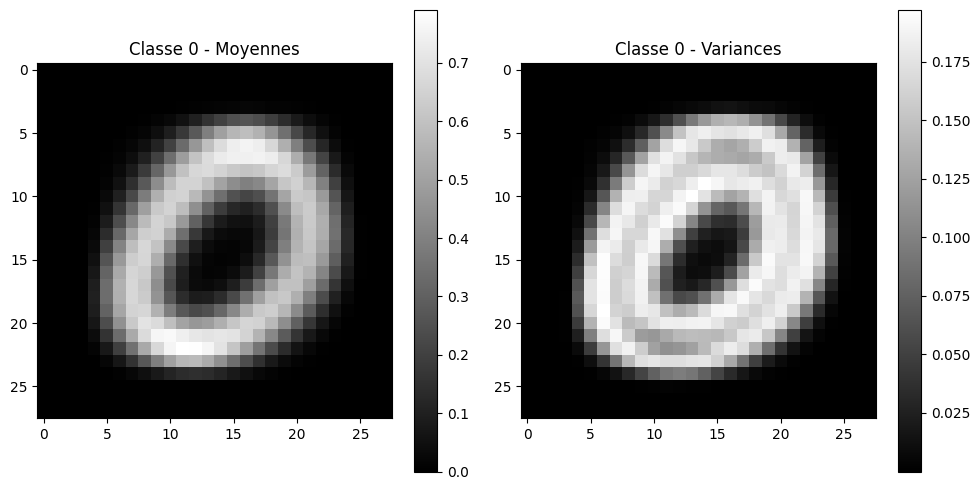

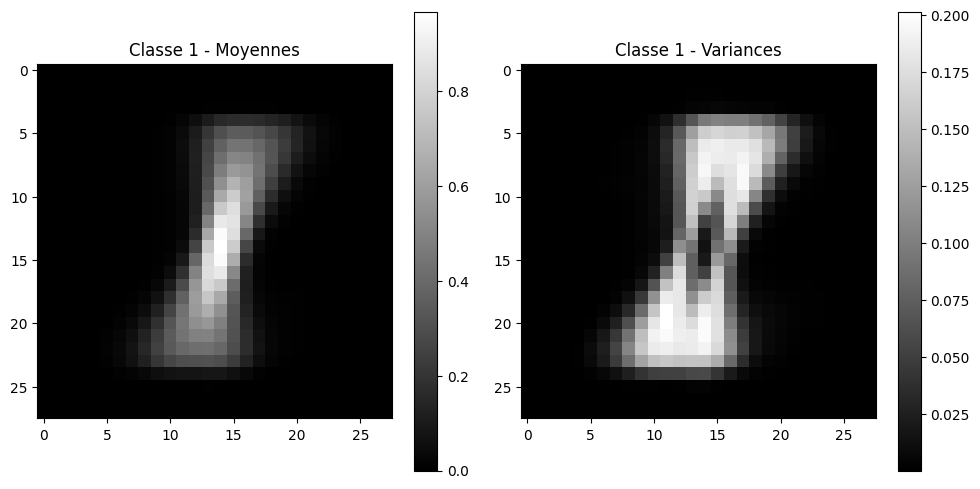

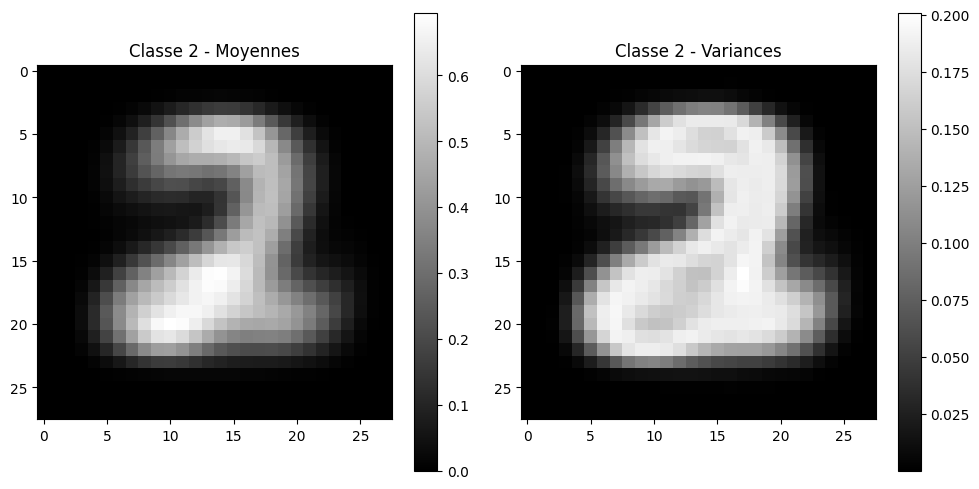

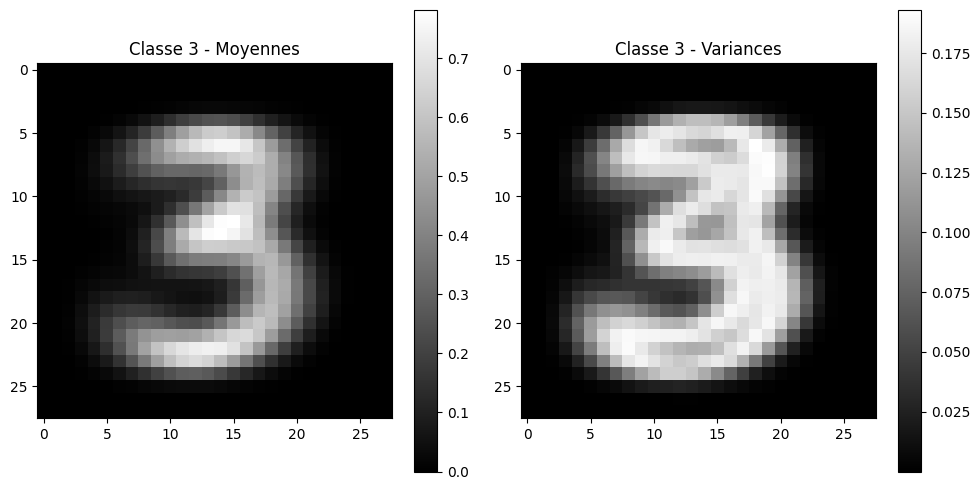

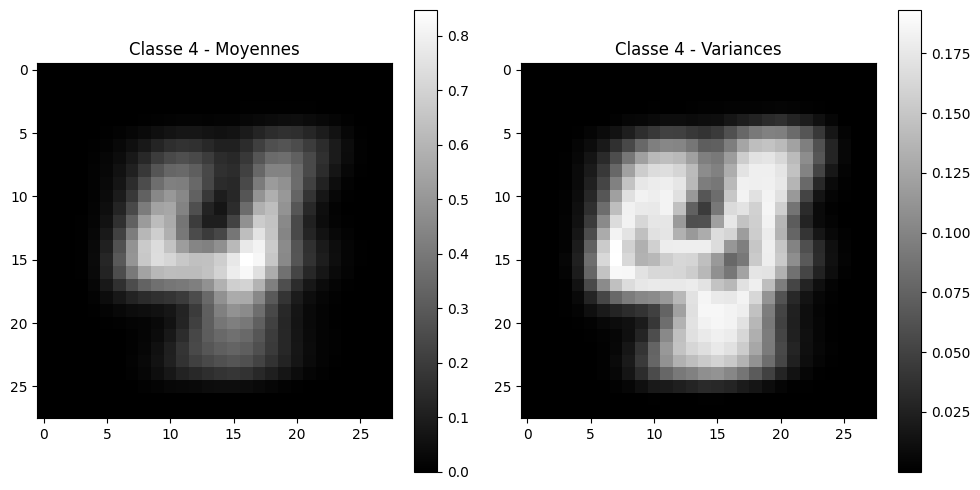

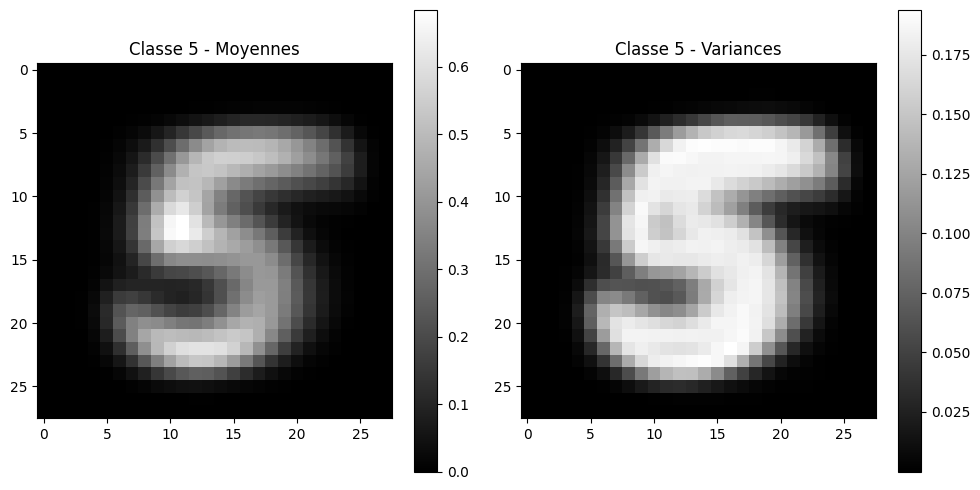

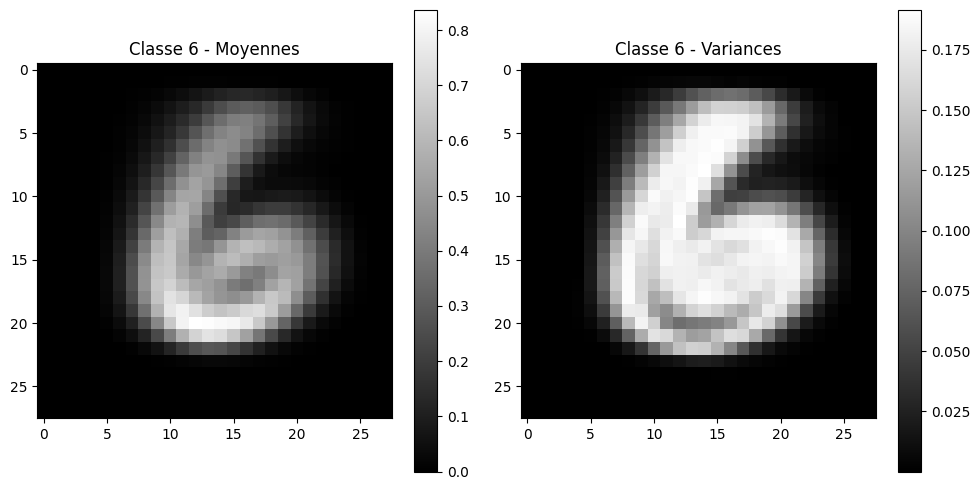

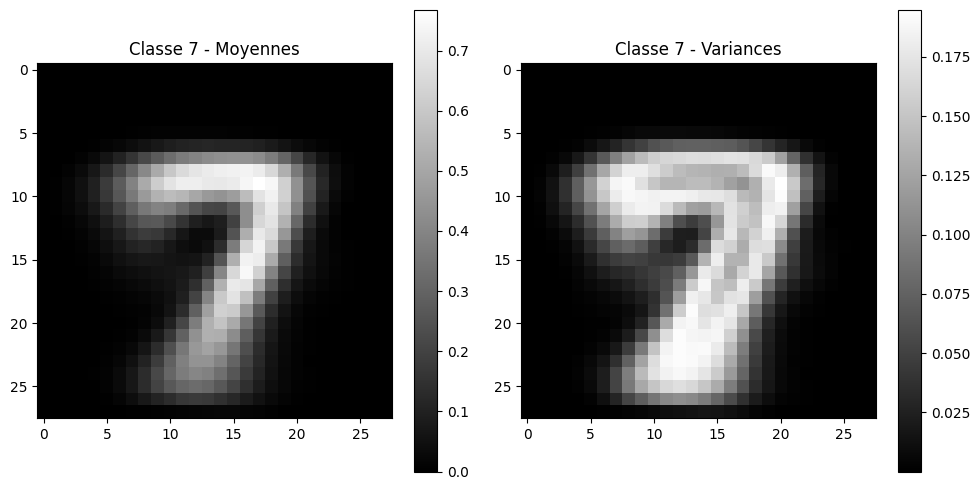

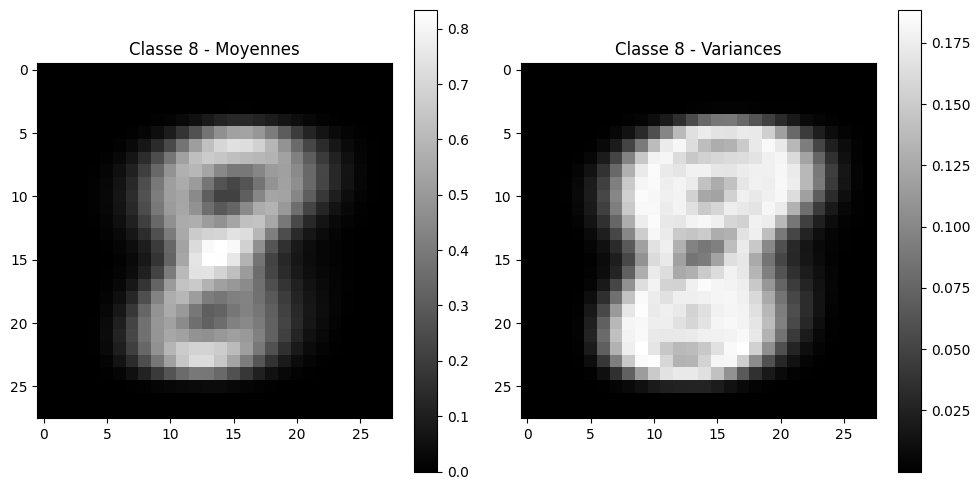

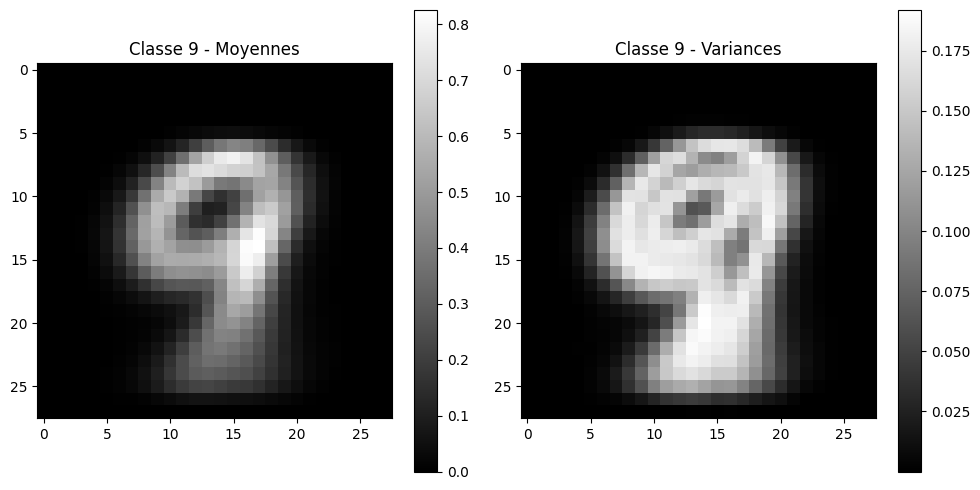

In [ ]:

n_classes = len(classifier_gaussian.theta_)

for i in range(n_classes):
    u = classifier_gaussian.theta_[i]
    v = classifier_gaussian.var_[i]
    u_image = u.reshape(28, 28)
    v_image = v.reshape(28, 28)


    plt.figure(figsize=(10, 5))

    # Moyennes
    plt.subplot(1, 2, 1)
    plt.imshow(u_image, cmap='gray')
    plt.title(f"Classe {i} - Moyennes")
    plt.colorbar()

    # Variances
    plt.subplot(1, 2, 2)
    plt.imshow(v_image, cmap='gray')
    plt.title(f"Classe {i} - Variances")
    plt.colorbar()

    plt.tight_layout()
    plt.show()



Reponse 9:

Comparaison:

Le score de ce classficateur est beaucoup plus bas que le SVM, ce resultat peut s'expliquer par l'hypothese d'independance des caractéristiques posée par le classificateur gaussianNB.

Les pixels des images sont corrélés, alors que le classificateur les traite indépendament ce qui limite sa capacité à capter la structure des images, ce qui fait que 45% des images test sont malclassées.

Contrairement aux classificateurs linéaires qui capturent mieux les dépendances et les relations entre les pixels

In [ ]:

score = accuracy_score(y_test, y_pred)
print(f"Le score de classification correcte est : {score:.2f}")

Le score de classification correcte est : 0.55


# III. Distribution des intensités umineuses

Reponse 10: Rassembler dans une liste toutes les valeurs d'intensité lumineuse pour ce pixel dans la base de donnée d'entraînement

In [ ]:

#Caluler l'index du pixel dans l'image
pixel_index = 10 * 28 + 15
#Extraire les valeurs d'intensité pour toutes les images
intensities_pixel = X_train[:, pixel_index]
print(f"Valeurs d'intensité lumineuse pour le pixel (10, 15) : {intensities_pixel[:10]}")



Valeurs d'intensité lumineuse pour le pixel (10, 15) : [0.         0.         0.99215686 0.         1.         0.
 0.         0.         0.82745098 0.96470588]


Reponse 11:Afficher l'histogramme de ces valeurs intensities_pixel

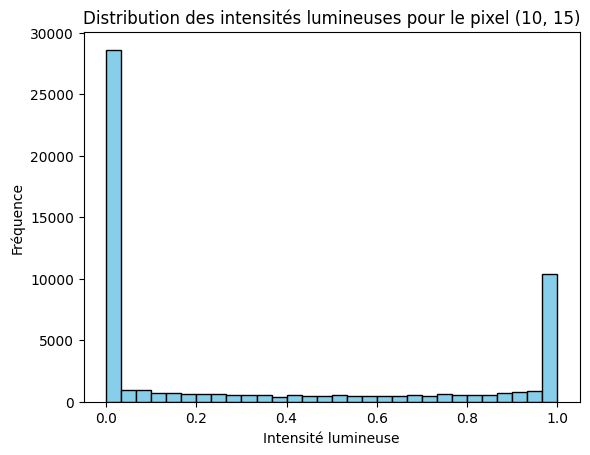

In [ ]:

plt.hist(intensities_pixel, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution des intensités lumineuses pour le pixel (10, 15)")
plt.xlabel("Intensité lumineuse")
plt.ylabel("Fréquence")
plt.show()


Reponse 12:
La distribution que vous avez affiché vous paraît-elle cohérente avec l'hypothèse d'une distribution gaussienne ? Pourquoi ?

Daprés l'image la distribution ne suit pas une distribution gaussienne normal, car on remaque uen faible variation de valeurs entre 0 et 1, et deux pics aux extremités, alors que dans une distribution normale où les valeurs seraient plus uniformément réparties autour de la moyenne, ce qui fait que classificateur gaussien n'est pas adapté à ces données



Reponse 13: Quelle distribution vous paraît plus adaptée à la représentation d'intensités ne prenant que deux valeurs (blanc ou noir) ?

Les distribution de Bernoulli ou multinomial sont plus adaptés pour les données

Reponse 14: Les données sont normalisées, donc  le threshold =127/255≈0.498

In [ ]:

threshold = 0.498

x_train_threshold = np.where(X_train <= threshold, 0, 1)
x_test_threshold = np.where(X_test <= threshold, 0, 1)

print(f"Dimensions de x_train_threshold : {x_train_threshold.shape}")
print(f"Dimensions de x_test_threshold : {x_test_threshold.shape}")

Dimensions de x_train_threshold : (56000, 784)
Dimensions de x_test_threshold : (14000, 784)


Reponse 15: Afficher à nouveau l'histogramme de la distribution des intensités pour quelques pixels.

L 'histogramme montre deux barres distinctes : une pour les pixels noirs (valeur 0) et une pour les pixels blancs (valeur 1), qui correspond à des intensité binaire


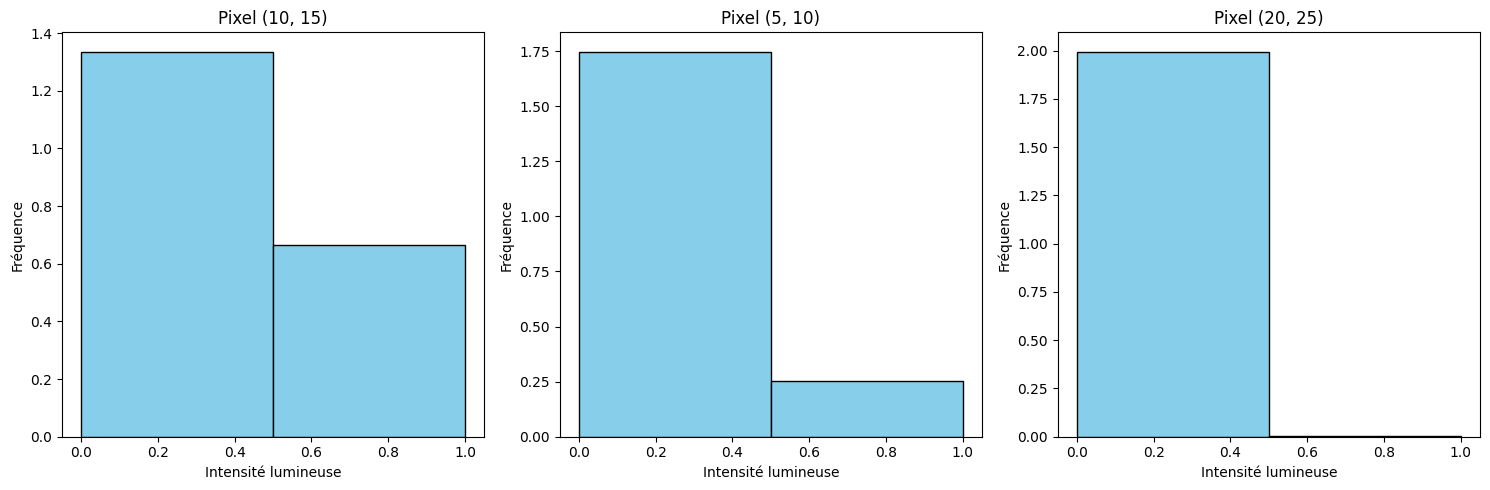

In [ ]:

pixel_indices = [
    10 * 28 + 15,
    5 * 28 + 10,
    20 * 28 + 25
]

# Créer une figure avec trois sous-graphiques pour afficher les histogrammes
plt.figure(figsize=(15, 5))

for i, pixel_index in enumerate(pixel_indices, 1):
    intensities_pixel = X_train[:, pixel_index]  # Extraire les intensités pour ce pixel

    plt.subplot(1, 3, i)
    plt.hist(intensities_pixel, bins=2, color='skyblue', edgecolor='black', density=True)
    plt.title(f"Pixel ({pixel_index // 28}, {pixel_index % 28})")
    plt.xlabel("Intensité lumineuse")
    plt.ylabel("Fréquence")


plt.tight_layout()
plt.show()


# IV. Cassificateur de Bernouli

Reponse 16:

In [ ]:
# Entrainement avec le modele Bernouli
classifier_bernoulli = BernoulliNB()
classifier_bernoulli.fit(x_train_threshold, y_train)

y_pred = classifier_bernoulli.predict(x_test_threshold)
accuracy = accuracy_score(y_test, y_pred)
print(f"Score de classification correcte : {accuracy:.2f}")



Score de classification correcte : 0.84


Reponse 17: Définir un tableau qui contienne les valeurs des probabilités pour la classe 0 Convertir ce tableau en matrice de dimension appropriées et l'afficher comme une image.


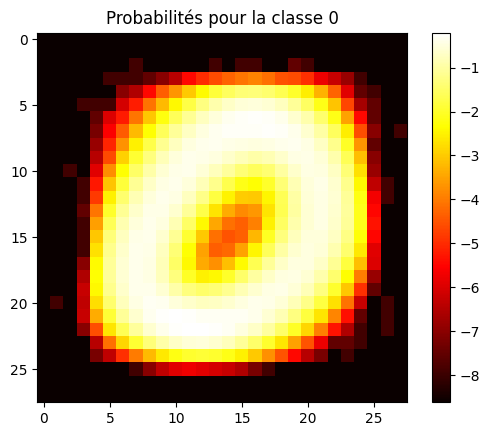

In [ ]:
# Extraire les probabilités
prob_class_0 = classifier_bernoulli.feature_log_prob_[0]
#Convertir en matrice
prob_class_0_matrix = prob_class_0.reshape(28, 28)

plt.imshow(prob_class_0_matrix, cmap='hot')
plt.title("Probabilités pour la classe 0")
plt.colorbar()
plt.show()



Reponse 18:Faire de même pour les autres classes et interpréter les résultats.

Intérprétation des résultats:

L'image représente la probabilité que chaque pixel d'une image d' un chiffre  soit allumé.

Les zones claires ont des probabilités élevées montrant les pixels qui sont toujours activés pour chaque classe.
Cela montre que certaines pixels des chiffres sont toujours activiées


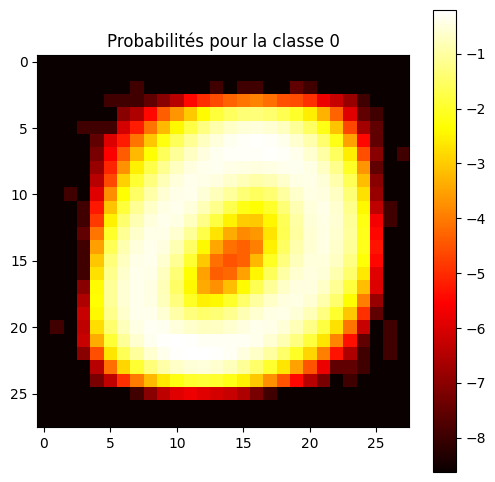

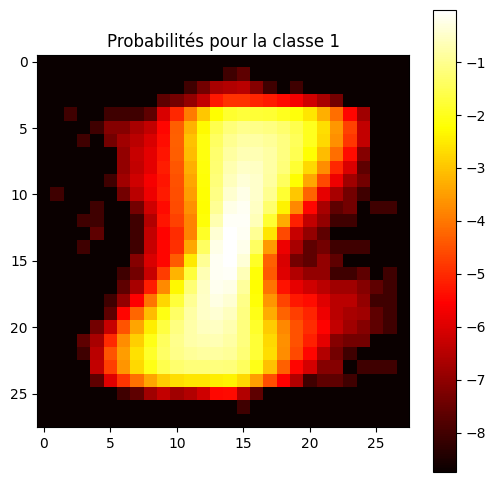

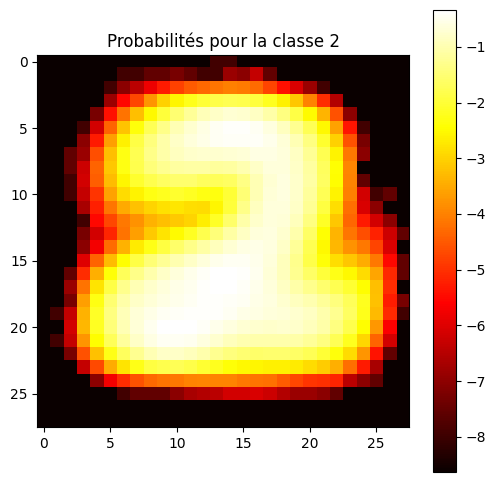

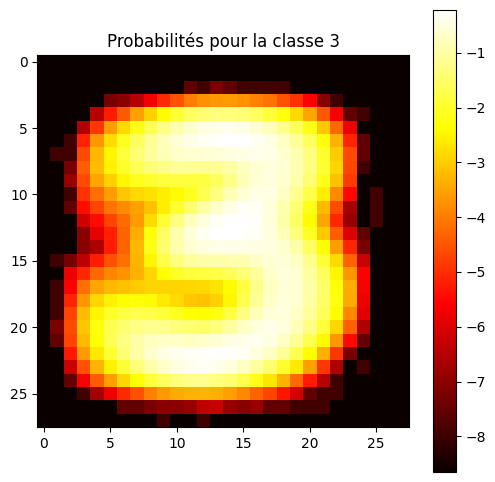

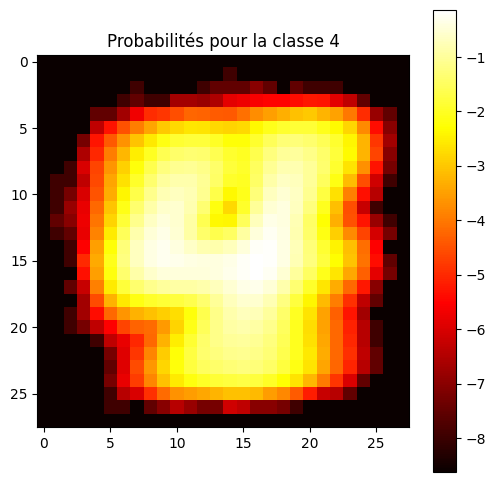

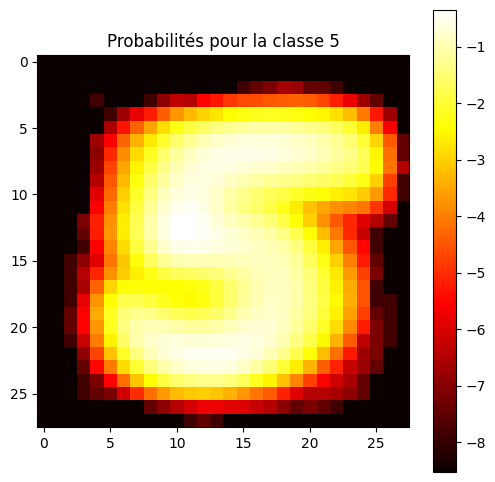

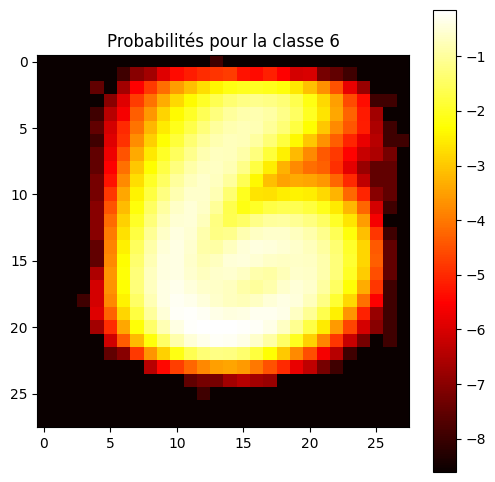

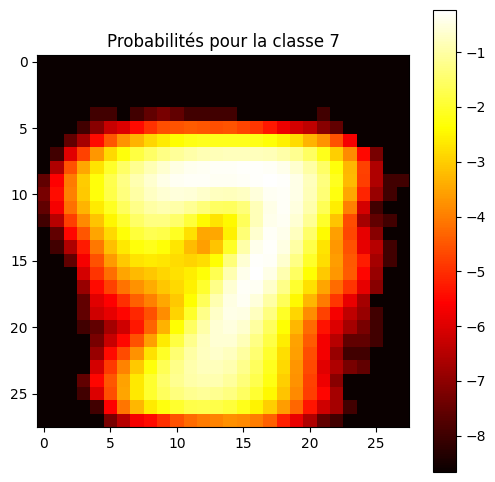

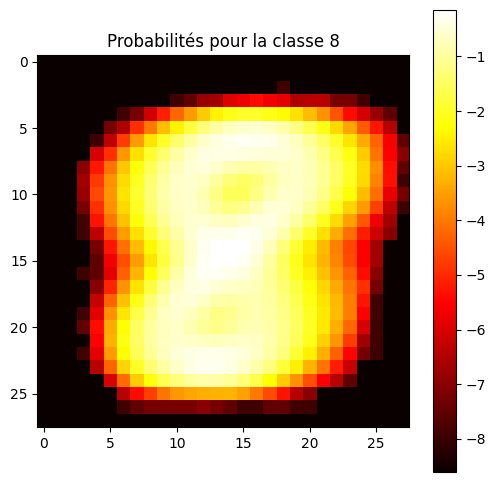

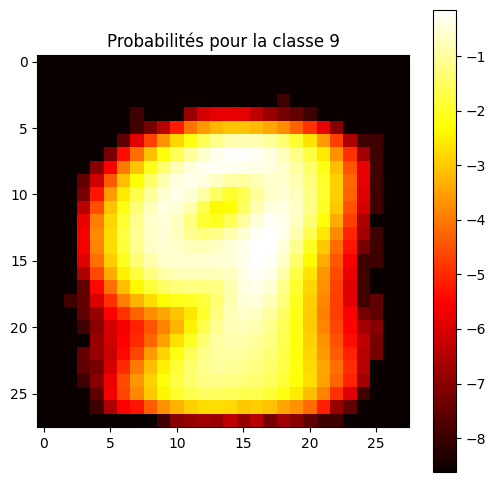

In [ ]:

for i in range(10):
    prob_class = classifier_bernoulli.feature_log_prob_[i]
    prob_class_image =  prob_class.reshape(28, 28)

    plt.figure(figsize=(6, 6))
    plt.imshow(prob_class_image, cmap='hot')
    plt.title(f"Probabilités pour la classe {i}")
    plt.colorbar()
    plt.show()



Reponse 19:

Le classificateur de benouli est plus performant que le classificateur Gaussien, mais reste moins pérformant que le classificatur linéaire.

Bernoulli Naive Bayes est limité par l'hypothèse d'indépendance des pixels.

Les classificateurs linéaires sont beaucoup plus performant, car ils capturent mieux les relations entre les pixels et les classes,

In [ ]:
# Score de classification correcte
accuracy = accuracy_score(y_test, y_pred)
print(f"Score de classification correcte : {accuracy:.2f}")

print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Score de classification correcte : 0.84

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1343
           1       0.85      0.95      0.90      1600
           2       0.88      0.82      0.85      1380
           3       0.78      0.80      0.79      1433
           4       0.81      0.80      0.81      1295
           5       0.80      0.74      0.77      1273
           6       0.88      0.91      0.89      1396
           7       0.93      0.86      0.89      1503
           8       0.78      0.76      0.77      1357
           9       0.74      0.82      0.78      1420

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



Réponse 20:
 le classificateur multinomial,
 basé sur la distribution multinomiale.

 Le score d' entrainment est légérement inferieur à celui de bernouli, et beaucoup plus inferieur aux autres, car le classificateur Multinomial est beacoup plus efficace pour des données discrètes, donc il nécessite une transformation des données en valeurs discrètes.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
classifier_multinomial = MultinomialNB()

# Entraîner le modèle sur les données d'entraînement
classifier_multinomial.fit(X_train, y_train)

# Calculer les scores de classification
train_score = accuracy_score(y_train, classifier_multinomial.predict(X_train))
test_score = accuracy_score(y_test, classifier_multinomial.predict(X_test))

print(f"MultinomialNB - Train score: {train_score:.2f}, Test score: {test_score:.2f}")

MultinomialNB - Train score: 0.83, Test score: 0.83


Réponse 21:

Les descripteurs HOG extraient les caractéristiques essentielles des images, comme les contours et orientations des traits, tout en réduisant le bruit.
Avec SVM, les resultats sont améliorés en utilisant X_hog, ce qui peut aussi s'appliquer dans cette deuxième partie
Les descripteurs HOG améliorent les performances des classificateurs bayésiens, surtout pour Gaussian Naive Bayes, car ils fournissent une représentation plus pertinente des chiffres manuscrits.

# Partie 03

# I. Perceptron mono-couche

Réponse 01:
 Exécuter les commandes et appliquer le classificateur (grâce à la fonction fit() vue aux TPs précédents) aux données d’entrainement de la base MNIST.

In [7]:
classifier = MLPClassifier(
    activation="relu", #fonction d’activation
    hidden_layer_sizes=(50), # nombre de neurones dans la couche cachée.
    solver="sgd", # méthode d’optimisation: descente de gradient stochastique
    learning_rate="constant", #taux d’apprentissage
    learning_rate_init=0.1,
    max_iter=100, #nombre maximal d'itérations pour l'apprentissage
    verbose=10,  # Permet de suivre l'évolution de l'apprentissage
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
# Entraînement sur les données d’entraînement
classifier.fit(X_train, y_train)


train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print(f"Score sur les données d'entraînement : {train_score:.2f}")
print(f"Score sur les données de test : {test_score:.2f}")

Iteration 1, loss = 0.32631800
Iteration 2, loss = 0.15158678
Iteration 3, loss = 0.11201328
Iteration 4, loss = 0.09120311
Iteration 5, loss = 0.07698485
Iteration 6, loss = 0.06772920
Iteration 7, loss = 0.05870427
Iteration 8, loss = 0.05305290
Iteration 9, loss = 0.04814225
Iteration 10, loss = 0.04193812
Iteration 11, loss = 0.03818689
Iteration 12, loss = 0.03392618
Iteration 13, loss = 0.03051921
Iteration 14, loss = 0.02943626
Iteration 15, loss = 0.02574586
Iteration 16, loss = 0.02430352
Iteration 17, loss = 0.02057193
Iteration 18, loss = 0.01758849
Iteration 19, loss = 0.01729685
Iteration 20, loss = 0.01571571
Iteration 21, loss = 0.01332217
Iteration 22, loss = 0.01184811
Iteration 23, loss = 0.01081348
Iteration 24, loss = 0.00943214
Iteration 25, loss = 0.00819809
Iteration 26, loss = 0.00729132
Iteration 27, loss = 0.00608676
Iteration 28, loss = 0.00555131
Iteration 29, loss = 0.00448119
Iteration 30, loss = 0.00401873
Iteration 31, loss = 0.00381095
Iteration 32, los

Réponse 02: Répéter l’opération pour différents choix des paramètres (en gardant verbose=10 qui permet de suivre
 l’évolution de l’apprentissage).  Tenter d’expliquer ce que la
 fonction fit() retourne et trouver alors un jeu de paramètres “convenable”

 La methode fit() entraine le réseau de neurones pour minimiser la fonction de perte loss, à chaque itération, la fonction effectue une mise à jour des poids basée sur la descente de gradient.

 Pour le param 1: selon les valeurs de la fonction loss, la convergence est lente mais fournit un excellent score

 Pour param 2: les resumtats sont similaires au premier mais converge plus rapide, cela est grace aux nombre de neurones élevé

Pour param 3: les scores sont légérement inférieur mais la convergence est rapide

Pour param 4: la convergence est instable, mais les scores sont bons


Plus le nombre de neurones dans la couche cachée est élevé, plus le modèle est capable de capturer des relations complexes dans les données.
Un nombre de 100 ou 150 est bon

Le parametre optimal pour le taux d'apprentissage est 0.02 selon les resultats

La méthode d' optimisation, Stochastic Gradient Descent fournit des resultats plus stables, mais adam legerement plus rapise

Et enfin Relu est la meilleur fonction de convergence car elle converge rapidement

Le choix plus optimal est : la combinaison hidden_layer_sizes=(150,), learning_rate_init=0.02, solver='sgd', et activation='relu'

In [22]:
# Tester différentes configurations
parametres = [
    {"hidden_layer_sizes": (100,), "learning_rate_init": 0.02, "solver": "sgd", "activation":"relu"}, #param 1
    {"hidden_layer_sizes": (150,), "learning_rate_init": 0.02, "solver": "sgd", "activation":"relu"}, #param 2
    {"hidden_layer_sizes": (50,), "learning_rate_init": 0.1, "solver": "sgd", "activation":"tanh"},   #param 3
    {"hidden_layer_sizes": (100,), "learning_rate_init": 0.02, "solver": "adam", "activation":"logistic"}, #param 4
]

for param in parametres:
    print(f"Test des paramètres : {param}")
    classifier = MLPClassifier(

        max_iter=100,
        verbose=10,
        random_state=42,
        **param
    )
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    print(f"Train score: {train_score:.2f}, Test score: {test_score:.2f}")


Test des paramètres : {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.02, 'solver': 'sgd', 'activation': 'relu'}
Iteration 1, loss = 0.48787619
Iteration 2, loss = 0.26238704
Iteration 3, loss = 0.21188477
Iteration 4, loss = 0.17853760
Iteration 5, loss = 0.15360990
Iteration 6, loss = 0.13535141
Iteration 7, loss = 0.12001355
Iteration 8, loss = 0.10817830
Iteration 9, loss = 0.09834472
Iteration 10, loss = 0.08964608
Iteration 11, loss = 0.08253238
Iteration 12, loss = 0.07600836
Iteration 13, loss = 0.07052474
Iteration 14, loss = 0.06587414
Iteration 15, loss = 0.06167946
Iteration 16, loss = 0.05805404
Iteration 17, loss = 0.05416473
Iteration 18, loss = 0.05103480
Iteration 19, loss = 0.04848234
Iteration 20, loss = 0.04553485
Iteration 21, loss = 0.04308948
Iteration 22, loss = 0.04076295
Iteration 23, loss = 0.03872564
Iteration 24, loss = 0.03702012
Iteration 25, loss = 0.03470210
Iteration 26, loss = 0.03332926
Iteration 27, loss = 0.03175769
Iteration 28, loss = 0.03

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score: 1.00, Test score: 0.98
Test des paramètres : {'hidden_layer_sizes': (150,), 'learning_rate_init': 0.02, 'solver': 'sgd', 'activation': 'relu'}
Iteration 1, loss = 0.47027923
Iteration 2, loss = 0.24762535
Iteration 3, loss = 0.19639337
Iteration 4, loss = 0.16385315
Iteration 5, loss = 0.14043324
Iteration 6, loss = 0.12326567
Iteration 7, loss = 0.10900220
Iteration 8, loss = 0.09820149
Iteration 9, loss = 0.08932781
Iteration 10, loss = 0.08114385
Iteration 11, loss = 0.07471978
Iteration 12, loss = 0.06879049
Iteration 13, loss = 0.06411329
Iteration 14, loss = 0.05940954
Iteration 15, loss = 0.05574423
Iteration 16, loss = 0.05199672
Iteration 17, loss = 0.04905520
Iteration 18, loss = 0.04629299
Iteration 19, loss = 0.04340017
Iteration 20, loss = 0.04096930
Iteration 21, loss = 0.03854900
Iteration 22, loss = 0.03626932
Iteration 23, loss = 0.03475210
Iteration 24, loss = 0.03263528
Iteration 25, loss = 0.03106310
Iteration 26, loss = 0.02949074
Iteration 27, loss = 

Réponse 03: Intérprétation des resultats

J'ai combiné la question 2 et 3 pour mieux voir les résultats, donc vous trouvrez les scores dnas la question précedente.
D'aprés l' intérprétation, le choix optimal est : Le choix plus optimal est : la combinaison hidden_layer_sizes=(150,), learning_rate_init=0.02, solver='sgd', et activation='relu

# II. Généraisation au cas muti-couches

## II.1. Données MNIST brutes


 L’avantage d’une approche multi-couches est qu’elle permet en général de drastiquement réduire le nombre de
 neurones que l’on utiliserait avec un réseau mono-couche pour atteindre le même niveau de performances.
 4. Confirmez cette affirmation en pratique en étudiant les performances atteintes par des réseaux simple
couche aux performances atteintes par des réseaux multi-couches.

Réponse 04:

Les résultats sont similaitres, alors que le réseau multi-couches réduie la taille des couches toute en maintenant les performances grace à la profondeur qui capture mieux la complexité


In [42]:

# Réseau multi-couches (2 couches cachées)
mlp_multi = MLPClassifier(hidden_layer_sizes=(60, 50),  activation="relu", solver="sgd", learning_rate_init=0.05, alpha=0.0001, max_iter=200, random_state=42, verbose=True)
mlp_multi.fit(X_train, y_train)
multi_train_score = mlp_multi.score(X_train, y_train)
multi_test_score = mlp_multi.score(X_test, y_test)
print(f"Réseau multi-couches - Train score: {multi_train_score:.2f}, Test score: {multi_test_score:.2f}")

Iteration 1, loss = 0.38366715
Iteration 2, loss = 0.15433028
Iteration 3, loss = 0.11407438
Iteration 4, loss = 0.09286872
Iteration 5, loss = 0.07856846
Iteration 6, loss = 0.06446421
Iteration 7, loss = 0.05741038
Iteration 8, loss = 0.04929669
Iteration 9, loss = 0.04353611
Iteration 10, loss = 0.03688148
Iteration 11, loss = 0.03289704
Iteration 12, loss = 0.02975590
Iteration 13, loss = 0.02435259
Iteration 14, loss = 0.02238640
Iteration 15, loss = 0.02097834
Iteration 16, loss = 0.01652664
Iteration 17, loss = 0.01472877
Iteration 18, loss = 0.01281691
Iteration 19, loss = 0.01026666
Iteration 20, loss = 0.01105046
Iteration 21, loss = 0.00799722
Iteration 22, loss = 0.00789452
Iteration 23, loss = 0.00586225
Iteration 24, loss = 0.00443968
Iteration 25, loss = 0.00359130
Iteration 26, loss = 0.00269080
Iteration 27, loss = 0.00171345
Iteration 28, loss = 0.00121545
Iteration 29, loss = 0.00107006
Iteration 30, loss = 0.00098393
Iteration 31, loss = 0.00088729
Iteration 32, los

Réponse 05:
Plusieurs couches est plus avantageuses car:

Chaque couche apprend des représentations abstraites à partir des couches précédentes. Les couches d'entrée apprennent des caractéristiques simples mais les couches suivantes utilisent ces caractéristiques pour capturer la compléxité des données

Il fournit des résultats similaires ou mieulleur avec moins de neurones en combinant plusiurs couches pour apprendre les relations complexes


Réponse 06:

In [43]:
# Afficher les informations sur les matrices de poids
for i, coef in enumerate(classifier.coefs_):
    print(f"Shape of matrix between layer {i} and {i+1}: {coef.shape}")

Shape of matrix between layer 0 and 1: (784, 60)
Shape of matrix between layer 1 and 2: (60, 50)
Shape of matrix between layer 2 and 3: (50, 10)


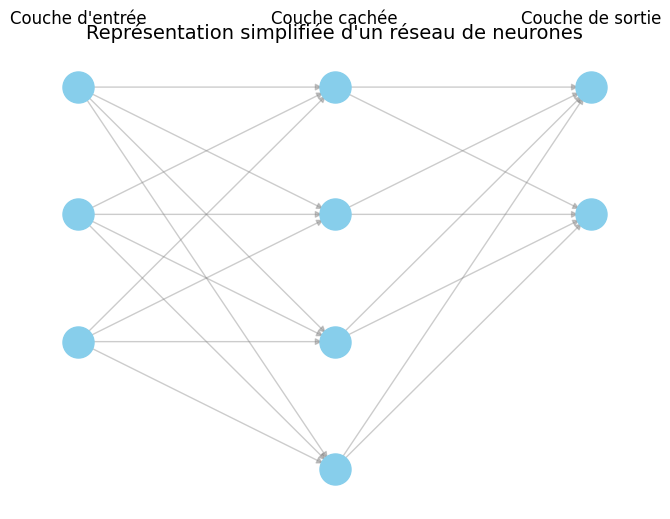

In [78]:
import matplotlib.pyplot as plt
import networkx as nx

#Dessiner une représentation simplifiée d'un réseau de neurones.

# Définir les couches (simplifié : 3 neurones en entrée, 4 cachés, 2 en sortie)
couches = [3, 4, 2]
etiquettes_couches = ["Couche d'entrée", "Couche cachée", "Couche de sortie"]

# Créer un graphe
G = nx.DiGraph()
pos = {}  # Positions des nœuds
decalage_x = 0  # Espacement horizontal entre les couches

# Ajouter les nœuds et leurs positions
for i, neurones in enumerate(couches):
    for j in range(neurones):
        nom_noeud = f"C{i}_N{j}"  # Nom unique pour chaque neurone
        G.add_node(nom_noeud)
        pos[nom_noeud] = (decalage_x, -j)
    decalage_x += 1  # Passer à la couche suivante

# Ajouter des connexions entre les couches
for i in range(len(couches) - 1):
    for j in range(couches[i]):  # Pour chaque neurone de la couche actuelle
        for k in range(couches[i + 1]):  # Connecter à chaque neurone de la couche suivante
            G.add_edge(f"C{i}_N{j}", f"C{i+1}_N{k}")

# Tracer le graphe
plt.figure(figsize=(8, 6))
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="gray")  # Arêtes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")  # Nœuds

# Ajouter les étiquettes pour les couches
for i, etiquette in enumerate(etiquettes_couches):
    x = i
    y = 0.5
    plt.text(x, y, etiquette, fontsize=12, ha="center", color="black")

# Mise en forme
plt.title("Représentation simplifiée d'un réseau de neurones", fontsize=14)
plt.axis("off")
plt.show()


Réponse 07:

l'ajout de couches supplémentaires dans un réseau multi-couches peut réduire le nombre de neurones par couche tout en maintenant de bonnes performances, ce qui peut être plus efficace en termes de nombre de paramètres.

In [45]:
# Nombre de paramètres pour un réseau mono-couche avec 100 neurones
params_mono_couche = 784 * 100 + 100 * 10

# Nombre de paramètres pour un réseau multi-couches avec 60 et 50 neurones
params_multi_couches = 784 * 60 + 60 * 50 + 50 * 10

print(f"Nombre de paramètres pour le réseau mono-couche : {params_mono_couche}")
print(f"Nombre de paramètres pour le réseau multi-couches : {params_multi_couches}")


Nombre de paramètres pour le réseau mono-couche : 79400
Nombre de paramètres pour le réseau multi-couches : 50540


## II.2. Représentation HOG

Parvient-on, grâce à cette représentation, à réduire la taille du réseau de neurones? Que peut-on en
 déduire?

Réponse 08:

On remarque que la différence entre les performances avec données brutes et HOG est de 0.01. Cette légere baisse de score avec HOG s ' accompagne avec une réduction significative de la taille du réseau de neurones. HOG extrait directement les gradients pertinents, réduisant ainsi le besoin de couches cachées volumineuses pour capturer les mêmes caractéristiques.

In [71]:
classifier = MLPClassifier(
    activation="relu", #fonction d’activation
    hidden_layer_sizes=(70), # nombre de neurones dans la couche cachée.
    solver="sgd", # méthode d’optimisation: descente de gradient stochastique
    learning_rate="constant", #taux d’apprentissage
    learning_rate_init=0.04,
    momentum=0.9, # pour accélérer la convergence
     alpha=0.0001,
    max_iter=800, #nombre maximal d'itérations pour l'apprentissage
    verbose=0,  # Permet de suivre l'évolution de l'apprentissage
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X_hog , y, test_size=0.2, random_state=42)
# Entraînement sur les données d’entraînement
classifier.fit(X_train, y_train)


train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print(f"Score sur les données d'entraînement : {train_score:.2f}")
print(f"Score sur les données de test : {test_score:.2f}")

Score sur les données d'entraînement : 1.00
Score sur les données de test : 0.97


In [68]:
# Réseau multi-couches ( 2 couches cachées)
mlp_multi = MLPClassifier(hidden_layer_sizes=(50, 50),  activation="relu", solver="sgd", learning_rate_init=0.05, alpha=0.0001, max_iter=1000, random_state=42, verbose=True)
mlp_multi.fit(X_train, y_train)
multi_train_score = mlp_multi.score(X_train, y_train)
multi_test_score = mlp_multi.score(X_test, y_test)
print(f"Réseau multi-couches - Train score: {multi_train_score:.2f}, Test score: {multi_test_score:.2f}")

Iteration 1, loss = 0.67679596
Iteration 2, loss = 0.22628114
Iteration 3, loss = 0.18891965
Iteration 4, loss = 0.17128331
Iteration 5, loss = 0.15714783
Iteration 6, loss = 0.14786789
Iteration 7, loss = 0.13928956
Iteration 8, loss = 0.13192043
Iteration 9, loss = 0.12588912
Iteration 10, loss = 0.12024267
Iteration 11, loss = 0.11576379
Iteration 12, loss = 0.11170444
Iteration 13, loss = 0.10863830
Iteration 14, loss = 0.10468096
Iteration 15, loss = 0.10132345
Iteration 16, loss = 0.09902014
Iteration 17, loss = 0.09595542
Iteration 18, loss = 0.09280742
Iteration 19, loss = 0.09089032
Iteration 20, loss = 0.08885321
Iteration 21, loss = 0.08597044
Iteration 22, loss = 0.08417503
Iteration 23, loss = 0.08242496
Iteration 24, loss = 0.08117980
Iteration 25, loss = 0.07855936
Iteration 26, loss = 0.07731837
Iteration 27, loss = 0.07782746
Iteration 28, loss = 0.07644547
Iteration 29, loss = 0.07301309
Iteration 30, loss = 0.07234340
Iteration 31, loss = 0.07015755
Iteration 32, los

# Partie 4:

# I.2. Prétraitement des données


In [11]:
import matplotlib.image as img
digits = img.imread("digits.png")

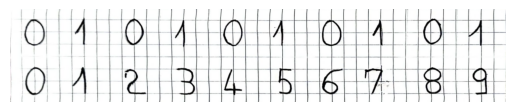

In [12]:
plt.imshow(digits)
plt.axis('off')  
plt.show()


In [13]:
digits.shape

(534, 2848, 4)

In [14]:
digits = np.mean(digits, 2)

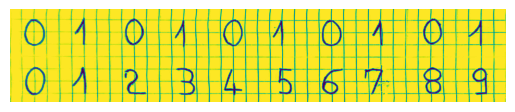

In [15]:
plt.imshow(digits)
plt.axis('off')  
plt.show()

In [16]:
digits.shape

(534, 2848)

In [17]:
digits[6,50:70]

array([1.        , 1.        , 1.        , 1.        , 0.9970588 ,
       0.9970588 , 0.9970588 , 0.9970588 , 0.99607843, 0.99803925,
       0.99803925, 0.99313724, 0.9637255 , 0.91862744, 0.86960787,
       0.8401961 , 0.84607846, 0.8813726 , 0.9166667 , 0.96568626],
      dtype=float32)

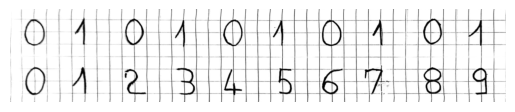

In [18]:
plt.imshow(digits, cmap="gray")
plt.axis('off')
plt.show()

In [19]:
digits_inv = 1 - digits

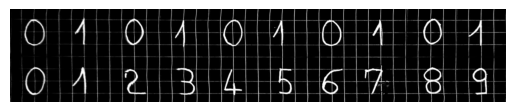

In [20]:
plt.imshow(digits_inv, cmap="gray")
plt.axis('off')
plt.show()

(-0.5, 2847.5, 533.5, -0.5)

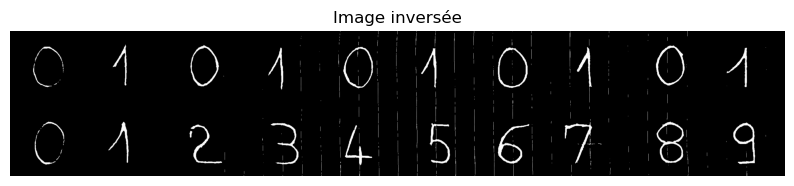

In [21]:
threshold = 0.62
image_binarized = (digits_inv > threshold).astype(float)

image_thresholded = np.where(digits_inv > threshold, digits_inv, 0)

# Affichage des résultats
plt.figure(figsize=(10, 5))

plt.imshow(image_thresholded, cmap="gray")
plt.title("Image inversée")
plt.axis('off')


In [24]:
from scipy.ndimage import zoom


In [22]:
digits = image_thresholded

In [40]:
from scipy.ndimage import zoom

# I.3. Découpage et mise à l'échelle 

In [41]:
digits.shape

(534, 2848)

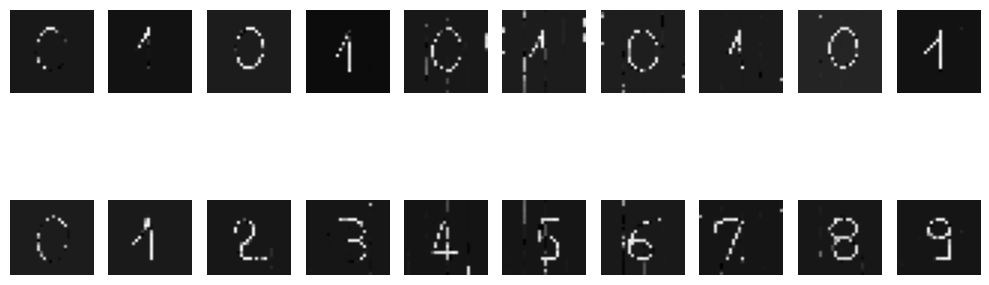

In [25]:
# Paramètres pour le découpage
size = (284, 284)  # Taille de chaque chiffre (exemple : 20x20 pixels)
top_left = (0, 0)  # Position du coin supérieur gauche du premier chiffre
num_rows, num_cols = 2, 10  # Nombre de lignes et colonnes de chiffres

# Liste pour stocker les chiffres découpés
digitss = []

# Découpage automatique
for i in range(num_rows):
    for j in range(num_cols):
        start_row = top_left[0] + i * size[0]
        end_row = start_row + size[0]
        start_col = top_left[1] + j * size[1]
        end_col = start_col + size[1]
        digit = digits[start_row:end_row, start_col:end_col]
        
        # Redimensionner au format 28x28
        digit_resized = zoom(digit, (28 / size[0], 28 / size[1]))
        digitss.append(digit_resized)

# Affichage des chiffres découpés
plt.figure(figsize=(10, 5))
for idx, digit in enumerate(digitss):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(digit, cmap="gray")
    plt.axis('off')
plt.tight_layout()
plt.show()

Ce code découpe une image contenant plusieurs chiffres manuscrits en zones individuelles, puis redimensionne chaque zone à une taille de 28x28 pixels. Il commence par définir la taille des zones contenant les chiffres (size), la position du coin supérieur gauche du premier chiffre (top_left), ainsi que le nombre de lignes et de colonnes de chiffres (num_rows, num_cols). Ensuite, il parcourt chaque position pour extraire un sous-ensemble de l'image correspondant à un chiffre. Chaque zone extraite est ensuite redimensionnée à 28x28 pixels à l'aide de la fonction zoom. Les chiffres découpés et redimensionnés sont stockés dans une liste (digitss). Enfin, les chiffres sont affichés dans un graphique avec imshow(), chacun dans une grille de sous-graphes.

In [26]:
len(digitss)

20

In [28]:
dim_x = 28
dim_y = 28

In [29]:
from skimage.transform import resize

In [30]:
resized_digits=[]
for i in range(len(digitss)):
    
        digit_resized = resize(digitss[i], (dim_x, dim_y), anti_aliasing=True)

        # Ajouter à la liste
        resized_digits.append(digit_resized)
    

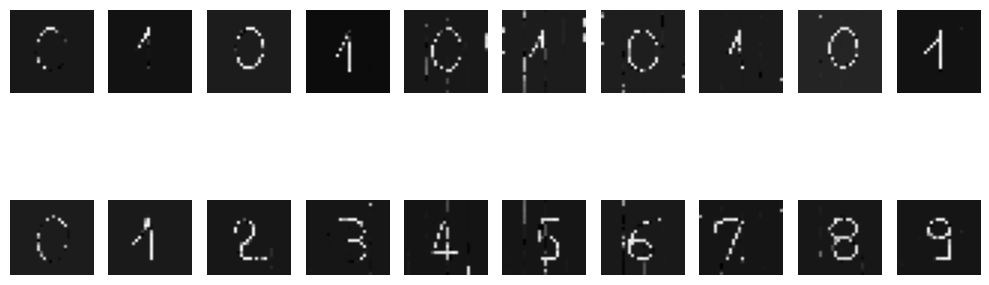

In [31]:
# Affichage des chiffres découpés
plt.figure(figsize=(10, 5))
for idx, digit in enumerate(digitss):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(digit, cmap="gray")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
exemple = resized_digits[0:10]
exemple1 = np.array(exemple)

In [33]:
exemple1.shape

(10, 28, 28)

In [34]:
X_sarah = exemple1.reshape(10, 784)

In [35]:
labels = ([0] + [1]) * 5
labels

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [36]:
X_test.shape

NameError: name 'X_test' is not defined

Ce code redimensionne les images découpées des chiffres manuscrits afin qu'elles correspondent à la taille attendue par un classificateur entraîné sur la base MNIST, qui utilise des images de 28x28 pixels. La fonction resize de la bibliothèque skimage est utilisée pour redimensionner chaque image de la liste digitss à la taille spécifiée par dim_x et dim_y, tout en appliquant un lissage (anti_aliasing=True) pour améliorer la qualité de l'image redimensionnée. Les images redimensionnées sont ensuite stockées dans la liste resized_digits. Enfin, un graphique est généré pour afficher toutes les images redimensionnées dans une grille, en utilisant imshow() pour chaque image, avec l'option cmap="gray" pour une visualisation en niveaux de gris.

In [37]:
# Convert to numpy array of strings
labels = np.array(labels, dtype=object).astype(str)

print(labels)

['0' '1' '0' '1' '0' '1' '0' '1' '0' '1']


# II. Classification

In [38]:
y_sarah =labels

Dans ce code, nous évaluons la performance du classificateur sur un ensemble de test. Nous commençons par prédire les étiquettes des données de test avec classifier.predict(X_sarah). Ensuite, nous utilisons la méthode score() pour calculer la précision du modèle, qui nous donne le pourcentage de prédictions correctes. Le rapport de classification fournit des métriques détaillées sur la performance du modèle, comme la précision et le rappel. Enfin, nous calculons manuellement l'accuracy en comparant les prédictions aux étiquettes réelles. Un score de 0.6 indique que le modèle a correctement prédit 60 % des étiquettes, ce qui suggère une performance modérée.








In [39]:
#Créez ainsi une base de données X_bin ne contenant que les chiffres 0 et 1.
X_0_1= X[(y=='1')+ (y=='0')]
y_0_1= y[(y=='1')+ (y=='0')]
#Vérifier que cela fonction bien
print(f"Les étiquettes présentent dans la BDD sont {np.unique(y_0_1)} ")


Les étiquettes présentent dans la BDD sont ['0' '1'] 


In [40]:
#Division des données en ensembles d'entraînement et de test en utilsant la fonction train_test_split qui prend 80% des données pour l'entrainement et le reste pour les tests
X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=42)

classifier = svm.SVC(kernel='linear')
#Entrainement du classifieur
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [61]:
# tester le classficateur sur la base de données d'entrainment
y_pred = classifier.predict(X_train)

train_score = classifier.score(X_train, y_train)

print(f"Score d'entraînement : {train_score:.2f}")
print(classification_report(y_train, y_pred))



Score d'entraînement : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5501
           1       1.00      1.00      1.00      6323

    accuracy                           1.00     11824
   macro avg       1.00      1.00      1.00     11824
weighted avg       1.00      1.00      1.00     11824



In [62]:
#Tester le classificateur sur la base de dnnées de test
y_test_pred = classifier.predict(X_sarah)
test_score = classifier.score(X_sarah, y_sarah)
print(f"Score de test : {test_score:.2f}")
print(classification_report(y_sarah, y_test_pred))



Score de test : 0.60
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



In [63]:
#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_sarah)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )


Le score retourné par classifier.score : 0.6, L' accuracy calculé: 0.6


In [64]:
#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_sarah)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )
# On constate les résultats sont exactes, donc le resultat classifier.score est bien correcte
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)


Le score retourné par classifier.score : 0.6, L' accuracy calculé: 0.6


KNeighborsClassifier(n_neighbors=11)

In [65]:
y_pred_knn = knn.predict(X_sarah)
accuracy_knn = accuracy_score(y_sarah, y_pred_knn)
print(f"Accuracy : {accuracy_knn:.2f}")
print(classification_report(y_sarah, y_pred_knn))


Accuracy : 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_sarah)
print(f"Probabilités (Entraînement)   :\n{y_train_proba}")
print(f"Probabilités (Test)  :\n{y_test_proba}")

Probabilités (Entraînement)   :
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Probabilités (Test)  :
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [68]:
#All classes

In [74]:
exemple = resized_digits[10:20]
exemple = np.array(exemple)

In [75]:
exemple.shape

(10, 28, 28)

In [76]:
X_sarah = exemple.reshape(10, 784)

In [77]:
labels = ([0] + [1]+ [2] + [3] + [4] + [5] + [6] + [7] + [8] + [9])
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
X_test.shape

(2956, 784)

Ce code redimensionne les images découpées des chiffres manuscrits afin qu'elles correspondent à la taille attendue par un classificateur entraîné sur la base MNIST, qui utilise des images de 28x28 pixels. La fonction resize de la bibliothèque skimage est utilisée pour redimensionner chaque image de la liste digitss à la taille spécifiée par dim_x et dim_y, tout en appliquant un lissage (anti_aliasing=True) pour améliorer la qualité de l'image redimensionnée. Les images redimensionnées sont ensuite stockées dans la liste resized_digits. Enfin, un graphique est généré pour afficher toutes les images redimensionnées dans une grille, en utilisant imshow() pour chaque image, avec l'option cmap="gray" pour une visualisation en niveaux de gris.

In [79]:
# Convert to numpy array of strings
labels = np.array(labels, dtype=object).astype(str)

print(labels)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


# II. Classification

In [80]:
y_sarah =labels

Dans ce code, nous évaluons la performance du classificateur sur un ensemble de test. Nous commençons par prédire les étiquettes des données de test avec classifier.predict(X_sarah). Ensuite, nous utilisons la méthode score() pour calculer la précision du modèle, qui nous donne le pourcentage de prédictions correctes. Le rapport de classification fournit des métriques détaillées sur la performance du modèle, comme la précision et le rappel. Enfin, nous calculons manuellement l'accuracy en comparant les prédictions aux étiquettes réelles. Un score de 0.6 indique que le modèle a correctement prédit 60 % des étiquettes, ce qui suggère une performance modérée.








In [ ]:
#Division des données en ensembles d'entraînement et de test en utilsant la fonction train_test_split qui prend 80% des données pour l'entrainement et le reste pour les tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = svm.SVC(kernel='linear')
#Entrainement du classifieur
classifier.fit(X_train, y_train)


In [61]:
# tester le classficateur sur la base de données d'entrainment
y_pred = classifier.predict(X_train)

train_score = classifier.score(X_train, y_train)

print(f"Score d'entraînement : {train_score:.2f}")
print(classification_report(y_train, y_pred))



Score d'entraînement : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5501
           1       1.00      1.00      1.00      6323

    accuracy                           1.00     11824
   macro avg       1.00      1.00      1.00     11824
weighted avg       1.00      1.00      1.00     11824



In [62]:
#Tester le classificateur sur la base de dnnées de test
y_test_pred = classifier.predict(X_sarah)
test_score = classifier.score(X_sarah, y_sarah)
print(f"Score de test : {test_score:.2f}")
print(classification_report(y_sarah, y_test_pred))



Score de test : 0.60
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



In [63]:
#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_sarah)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )


Le score retourné par classifier.score : 0.6, L' accuracy calculé: 0.6


In [64]:
#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_sarah)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )
# On constate les résultats sont exactes, donc le resultat classifier.score est bien correcte
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)


Le score retourné par classifier.score : 0.6, L' accuracy calculé: 0.6


KNeighborsClassifier(n_neighbors=11)

In [65]:
y_pred_knn = knn.predict(X_sarah)
accuracy_knn = accuracy_score(y_sarah, y_pred_knn)
print(f"Accuracy : {accuracy_knn:.2f}")
print(classification_report(y_sarah, y_pred_knn))


Accuracy : 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
y_train_proba = knn.predict_proba(X_train)
y_test_proba = knn.predict_proba(X_sarah)
print(f"Probabilités (Entraînement)   :\n{y_train_proba}")
print(f"Probabilités (Test)  :\n{y_test_proba}")

Probabilités (Entraînement)   :
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Probabilités (Test)  :
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
#Approche par extension de la base de données

In [ ]:
dé

In [42]:
decalage=8

In [43]:
# Précedament on a extré les valeurs des étiquettes '0' et '1' dans X_0_1 et y_0_1

# Création de la classe 'z' en mal centrant les images des classe '0' et '1'
# On décale les valeurs de X_0_1 pour créer X_z
X_z= np.roll(X_0_1, shift=decalage, axis=1)
y_z = np.array(['z'] * len(X_z))

# Creation de la nouvelle base de données composées des classes '0', '1' et 'z'
X_combiner = np.concatenate([X_0_1, X_z])
y_combiner = np.concatenate([y_0_1, y_z])

# Vérifion la les valeurs des étiquettes
print(f"Les valeurs des étiquettes présentes: {np.unique(y_combiner)}")

Les valeurs des étiquettes présentes: ['0' '1' 'z']


In [45]:
# Précedament on a extré les valeurs des étiquettes '0' et '1' dans X_0_1 et y_0_1

# Création de la classe 'z' en mal centrant les images des classe '0' et '1'
# On décale les valeurs de X_0_1 pour créer X_z
X_zsarah= np.roll(X_sarah, shift=decalage, axis=1)
y_zsarah = np.array(['z'] * len(X_zsarah))

# Creation de la nouvelle base de données composées des classes '0', '1' et 'z'
X_combiner_sarah = np.concatenate([X_sarah, X_zsarah])
y_combiner_sarah = np.concatenate([y_sarah, y_zsarah])

# Vérifion la les valeurs des étiquettes
print(f"Les valeurs des étiquettes présentes: {np.unique(y_combiner_sarah)}")

Les valeurs des étiquettes présentes: ['0' '1' 'z']


In [49]:
X_combiner_sarah.shape

(20, 784)

In [ ]:
#Division des données en ensembles d'entraînement et de test en utilsant la fonction train_test_split qui prend 80% des données pour l'entrainement et le reste pour les tests
# Splitting the data and adding shuffling
XZ_train, XZ_test, yZ_train, yZ_test = train_test_split(
    X_combiner, y_combiner, test_size=0.2, random_state=42, shuffle=True
)
classifier = svm.SVC(kernel='linear')
#Entrainement du classifieur
classifier.fit(XZ_train, XZ_test)

In [52]:
# tester le classficateur sur la base de données d'entrainment
y_pred = classifier.predict(XZ_train)

train_score = classifier.score(XZ_train, yZ_train)

print(f"Score d'entraînement : {train_score:.2f}")
print(classification_report(yZ_train, y_pred))



Score d'entraînement : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           z       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [62]:
#Tester le classificateur sur la base de dnnées de test
y_test_pred = classifier.predict(X_combiner_sarah)
test_score = classifier.score(X_combiner_sarah, y_combiner_sarah)
print(f"Score de test : {test_score:.2f}")
print(classification_report(y_combiner_sarah, y_test_pred))



Score de test : 0.60
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



In [63]:
#On compare les prédiction avec l'étiquette réelle ce qui correspond au pourcentage de prédictions correctes.
accuracy_calcul = np.mean(y_test_pred == y_combiner_sarah)
print(f"Le score retourné par classifier.score : {test_score}, L' accuracy calculé: {accuracy_calcul}" )


Le score retourné par classifier.score : 0.6, L' accuracy calculé: 0.6
